# Projeto 2 - Ciência dos Dados

Integrantes: 

- Anderson Franco Júnior
- Luiz Miguel Moraes Berredo
- Samuel Jabes Costa Cavalcanti
- Vinícius Rodrigues de Freitas

<div id="indice"></div>

## Índice

1. [Visão Geral;](#visao_geral)
2. [Limpando a base de dados;](#limpeza)
    - [2.1. Lendo a base de dados e visualizando seu conteúdo;](#lendo-base)
    - [2.2. Separando os dataframes e os tratando;](#separando-df)
    
    
3. [Análise exploratória;](#analise_explor)
    - [3.1. Analisando a variável target;](#analise-target)
    - [3.2. Questões diretamente vinculadas à target;](#analise-vinculos)
    - [3.3. Analisando informações demográficas;](#analise-demograficas)
    - [3.4. Analisando informações financeiras;](#analise-financeira)
    - [3.5. Estabelecendo relevância;](#estabelece-relevancia)


4. [Aplicação do modelo;](#aplicando-modelo)
    - [4.1. Separando conjunto de treino e teste;](#treino-teste)
    - [4.2. Treinando o modelo DecisionTreeClassifier;](#decision-tree)
    - [4.3. Treinando o RandomForestClassifier;](#random-forest)
    - [4.4. Treinando o Naive-Bayes;](#naive-bayes)
    

5. [Análise de desempenho;](#analise-desempenho)
    - [5.1. Implementando a Validação Cruzada (K-Folds);](#cross-validation)
    - [5.2. Matriz de confusão;](#matriz-confusao)
    - [5.3. Comparação dos modelos;](#comparacao-modelos)
    
    
6. [Conclusão;](#conclusao)
7. [Possíveis melhorias;](#melhorias)

##### Carregando algumas bibliotecas

In [1]:
%matplotlib inline
# A linha acima é necessária para visualizar os gráficos no jupyter notebook

import os
import pandas as pd
# Módulo com funções matemáticas para arrays multidimensionais (matrizes)
import numpy as np
# Módulo com funções de geração de gráficos
import matplotlib.pyplot as plt
# Módulo com funções de cunho estatístico
from scipy import stats
import seaborn as sns
# Função para dividir conjuntos de treino e teste para aplicação do modelo
from sklearn.model_selection import train_test_split

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Vinicius Rodrigues\Desktop\Insper\Segundo Semestre\CDados\23-1a-cd-p2-anderson_samuel_vinicius


**Carregando as bases de dados**

<div id='visao_geral'></div>

# 1. Visão Geral

<img src="https://www.social.go.gov.br/images/2022/cadunico.png" alt="">

##### Objetivo
- Com a base de dados obtida acerca de conhecimentos e práticas financeiras de pessoas cadastradas no CADÚnico, o projeto que apresentaremos tem como objetivo principal aplicar modelos de classificação para compreender e analisar `os fatores que influenciam no endividamento de pessoas cadastradas no CADUnico`, sendo este o tema central deste projeto. O CADUnico (Cadastro Único para Programas Sociais do Governo Federal) é um instrumento que reúne informações socioeconômicas das famílias de baixa renda no Brasil, sendo utilizado como base para a seleção e implementação de políticas públicas.

##### Motivação
- O endividamento é uma questão preocupante e desafiadora que afeta muitas pessoas em diferentes contextos socioeconômicos. No caso específico das famílias cadastradas no CADUnico, é fundamental compreender os fatores que contribuem para esse endividamento, a fim de desenvolver estratégias eficazes para lidar com essa situação.

- Ao entender os fatores que influenciam o endividamento, é possível identificar padrões, correlações e variáveis relevantes que contribuem para o problema.

##### Dados

Nossos dados foram coletados de seção "Educação financeira" do link https://www.gov.br/mds/pt-br/servicos/sagi/microdados, onde foram disponibilizados pela Secretaria de Avaliação e Gestão da Informação do Ministério do Desenvolvimento Social. Eles são um conjunto de três dataframes, relacionados a dois questionários entregues às famílias do CadÚnico em 2011 - um para responsáveis financeiros e outro para cônjugues.
Optamos por utilizar os dados somente do questionário dos responsáveis financeiros. Esses dados acompanham ainda um dicionário, que traduz os rótulos de todos os valores contidos no DataFrame.
O questionário está disponível na pasta `Questionários` do GitHub, da mesma forma o dicionário está disponível na pasta `Dicionarios`.

##### Target

Nosso Target será a coluna `R52` da base de dados, que contém as respostas para a pergunta "Alguma vez o(a) sr(a) ficou com o nome sujo na praça, ou seja, teve seu nome registrado no SERASA ou Serviço de Proteção ao Crédito?".

<div id="limpeza"></div>

# 2. Limpando a base de dados

<div id="lendo-base"></div>

## 2.1. Lendo a base de dados e visualizando seu conteúdo

Primeiramente vamos abrir a base de dados e entender as características desta.

In [2]:
responsaveis_df = pd.read_csv('Data/Base_Responsaveis.csv', encoding='latin1', sep=';')
responsaveis_df.head(5)

,ID_DOM,CodIBGE7,CodUF,R01,R02D,R02M,R02A,R03,R04,R05,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,2,4,2,1977,2,5,1,...,,,,2,2,2,2,2,1,2
1,2,1200385,12,2,6,7,1977,1,3,1,...,,,,2,2,2,2,2,1,1
2,3,2311801,23,2,22,9,1986,2,3,2,...,,,,2,2,2,2,2,1,1
3,4,2311801,23,2,14,9,1983,4,3,1,...,,,,2,2,2,2,2,2,
4,5,2311801,23,2,18,9,1976,2,2,2,...,,,,2,2,2,2,2,1,1


In [3]:
responsaveis_df.shape

(8827, 482)

In [4]:
nomes_colunas = [x.upper() for x in list(responsaveis_df.columns)]
responsaveis_df.columns = nomes_colunas
nomes_colunas

['ID_DOM',
 'CODIBGE7',
 'CODUF',
 'R01',
 'R02D',
 'R02M',
 'R02A',
 'R03',
 'R04',
 'R05',
 'R05A',
 'R06_01',
 'R07_01',
 'R08_01',
 'R09_01',
 'R06_02',
 'R07_02',
 'R08_02',
 'R09_02',
 'R06_03',
 'R07_03',
 'R08_03',
 'R09_03',
 'R10A',
 'R10B',
 'R11',
 'R12',
 'R17_01',
 'R17_02',
 'R17_03',
 'R17_04',
 'R17_05',
 'R17_06',
 'R17_07',
 'R17_08',
 'R17_09',
 'R18_01',
 'R18_02',
 'R18_03',
 'R19_01',
 'R20_01',
 'R19_02',
 'R20_02',
 'R19_03',
 'R20_03',
 'R19_04',
 'R20_04',
 'R19_05',
 'R20_05',
 'R19_06',
 'R20_06',
 'R19_07',
 'R20_07',
 'R19_08',
 'R20_08',
 'R19_09',
 'R20_09',
 'R19_10',
 'R20_10',
 'R19_11',
 'R20_11',
 'R19_12',
 'R20_12',
 'R19_13',
 'R20_13',
 'R19_14',
 'R20_14',
 'R19_15',
 'R20_15',
 'R19_16',
 'R20_16',
 'R19_17',
 'R20_17',
 'R19_18',
 'R20_18',
 'R19_98',
 'R20_98',
 'R21',
 'R22',
 'R23_01',
 'R23_02',
 'R23_03',
 'R23_04',
 'R23_05',
 'R24',
 'R25',
 'R26_01',
 'R26_02',
 'R26_03',
 'R26_04',
 'R26_05',
 'R27_01',
 'R27_02',
 'R27_03',
 'R27_0

**Manipulando as colunas do DataFrame**

Algumas colunas são referentes à mesma pergunta do questionário, vamos criar um dicionário onde cada chave é referente a uma pergunta e seu valor é uma lista de colunas associadas à pergunta.

In [5]:
col_per_quest = {}
for i in range(len(nomes_colunas)):
    in_car = nomes_colunas[i][0:3]
    if(in_car not in col_per_quest.keys()):
        col_per_quest[in_car] = [nomes_colunas[i]]
    else:
        col_per_quest[in_car].append(nomes_colunas[i])
col_per_quest

{'ID_': ['ID_DOM'],
 'COD': ['CODIBGE7', 'CODUF'],
 'R01': ['R01'],
 'R02': ['R02D', 'R02M', 'R02A'],
 'R03': ['R03'],
 'R04': ['R04'],
 'R05': ['R05', 'R05A'],
 'R06': ['R06_01', 'R06_02', 'R06_03'],
 'R07': ['R07_01', 'R07_02', 'R07_03'],
 'R08': ['R08_01', 'R08_02', 'R08_03'],
 'R09': ['R09_01', 'R09_02', 'R09_03'],
 'R10': ['R10A', 'R10B'],
 'R11': ['R11'],
 'R12': ['R12'],
 'R17': ['R17_01',
  'R17_02',
  'R17_03',
  'R17_04',
  'R17_05',
  'R17_06',
  'R17_07',
  'R17_08',
  'R17_09'],
 'R18': ['R18_01', 'R18_02', 'R18_03'],
 'R19': ['R19_01',
  'R19_02',
  'R19_03',
  'R19_04',
  'R19_05',
  'R19_06',
  'R19_07',
  'R19_08',
  'R19_09',
  'R19_10',
  'R19_11',
  'R19_12',
  'R19_13',
  'R19_14',
  'R19_15',
  'R19_16',
  'R19_17',
  'R19_18',
  'R19_98'],
 'R20': ['R20_01',
  'R20_02',
  'R20_03',
  'R20_04',
  'R20_05',
  'R20_06',
  'R20_07',
  'R20_08',
  'R20_09',
  'R20_10',
  'R20_11',
  'R20_12',
  'R20_13',
  'R20_14',
  'R20_15',
  'R20_16',
  'R20_17',
  'R20_18',
  'R

<div id="separa-df"></div>

## 2.2. Separando os dataframes e os tratando

Antes de tratarmos de colunas referentes a uma mesma pergunta, para podermos partir para o desenvolvimento dos modelos e aplicação das ferramentas estatísticas, faz-se necessário limpar a base dados uma vez que esta apresenta um certo grau de "caos", digamos assim, com uma quantidade considerável de colunas e muitos valores nulos em diversas variáveis. 

Logo, para começar, vamos:

### Informações demográficas

`Informações demográficas`: separamos em um novo dataframe informações referentes ao indívíduo em si, como gênero, grau de escolaridade e data de nascimento, o que consideramos importantes para a análise. Felizmente, tal conjunto não apresenta anomalias, logo não será necessário filtrar coisa alguma.

_Apêndice_: embora não consideramos aqui as informações de localidade para as informações demográficas (o que consideramos relevante também), mais abaixo elas serão consideradas. Estamos fazendo isso apenas para não haver repetição de colunas no nosso dataframe final (em questão de tratamento). 

In [6]:
col_demografico = ['ID_DOM', 'CODIBGE7', 'CODUF', 'R01', 'R02D', 'R02M', 'R02A', 'R03', 'R04']
info_demografico = responsaveis_df.loc[:, col_demografico]
info_demografico.head(5)

,ID_DOM,CODIBGE7,CODUF,R01,R02D,R02M,R02A,R03,R04
0,1,1101476,11,2,4,2,1977,2,5
1,2,1200385,12,2,6,7,1977,1,3
2,3,2311801,23,2,22,9,1986,2,3
3,4,2311801,23,2,14,9,1983,4,3
4,5,2311801,23,2,18,9,1976,2,2


### Informações monetárias

`Informações monetárias`: notamos que existem algumas variáveis que tratam sobre o recebimento e gasto de dinheiro de cada indivíduo, o que entendemos que é bastante relevante haja vista que essa abordagem permite uma compreensão mais precisa e detalhada dos hábitos financeiros das pessoas, além de identificar possíveis desequilíbrios entre renda e despesas.

In [7]:
col_money = ['R10A', 'R10B', 'R20_01', 'R20_02', 'R20_03', 'R20_04', 'R20_05', 'R20_06', 'R20_07', 'R20_08', 'R20_09', 
             'R20_10', 'R20_11', 'R20_12', 'R20_13', 'R20_14', 'R20_15', 'R20_16', 'R20_17','R20_18', 'R20_98', 'R22', 'R25',
             'R39', 'R82']
info_money = responsaveis_df.loc[:, col_money]
info_money = info_money.astype(str)
info_money.head(5)

,R10A,R10B,R20_01,R20_02,R20_03,R20_04,R20_05,R20_06,R20_07,R20_08,...,R20_14,R20_15,R20_16,R20_17,R20_18,R20_98,R22,R25,R39,R82
0,545,"9999,97",92,,,,,,,,...,,,,,,,,,"9999,97",14
1,545,"9999,97",112,,,,,,,,...,,,,,,,,,"9999,97","9999,97"
2,,,102,,,,,,,,...,,,,,,,,,"9999,97","9999,97"
3,545,"9999,97",90,,,,,,,,...,,,,,,,,,"9999,97","9999,97"
4,,,134,,,,,,,,...,,,,,,,,,"9999,97",6


Note que, desta vez, possuímos uma vasta quantidade de valores nulos em diferentes colunas. Para não trabalharmos com valores do tipo, decidimos que é interessante substituí-los pelo valor 0, uma vez que estamos tratando de quantidade monetária, seja esta quantidade um recebimento ou um gasto.

In [8]:
for column in list(info_money):
    info_money.loc[[(not x.isnumeric()) for x in info_money[column]], column] = '0'

info_money.head(5)

,R10A,R10B,R20_01,R20_02,R20_03,R20_04,R20_05,R20_06,R20_07,R20_08,...,R20_14,R20_15,R20_16,R20_17,R20_18,R20_98,R22,R25,R39,R82
0,545,0,92,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1,545,0,112,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,102,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,545,0,90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


### Informações sobre tempo

`Informações sobre tempo`: uma vez que o tempo pode ser considerada como uma variável quantitativa, mas com um conceito mais abstrato em quesito de ser algo palpável como quantidade, aqui separamos-a e entendemos que quando as pessoas dizem que não sabem ou não tem noção do tempo, ou até mesmo não responderam, decidimos que substituir por _0_ mostra-se mais viável, até mesmo em quesito de preenchimento.

In [9]:
col_time = ['R37H', 'R37M', 'R38H', 'R38M', 'R08_01', 'R08_02', 'R08_03']
info_time = responsaveis_df.loc[:, col_time]
info_time = info_time.astype(str)

In [10]:
# Anulando as linhas 99 e 97 da pergunta 37
linhas_99_97_37 = info_time[(info_time['R37H'] == '99') | (info_time['R37H'] == '97') | (info_time['R37H'] == ' ')].index

info_time.loc[linhas_99_97_37, ['R37H','R37M']] = '0'

# Anulando as linhas 99 e 97 da pergunta 38
linhas_99_97_38 = info_time[(info_time['R38H'] == '99') | (info_time['R38H'] == '97') | (info_time['R38H'] == ' ')].index

info_time.loc[linhas_99_97_38, ['R38H','R38M']] = '0'

# Anulando quando o responsável não informa a quantidade de horas trabalhada:
horas_trab = ['R08_01', 'R08_02', 'R08_03']
for column in horas_trab:
    info_time.loc[[(not str(x).isnumeric()) for x in info_time[column]], column] = '0'
    
info_time

,R37H,R37M,R38H,R38M,R08_01,R08_02,R08_03
0,0,20,0,5,36,0,0
1,0,20,0,10,40,0,0
2,6,0,2,0,0,0,0
3,0,30,0,15,40,0,0
4,1,0,0,30,0,0,0
...,...,...,...,...,...,...,...
8822,2,30,0,30,0,0,0
8823,0,15,0,5,0,0,0
8824,0,30,0,5,0,0,0
8825,0,40,0,15,20,0,0


### Informações categóricas

`Informações categóricas`: agora, por fim, o que nos sobra (em maioria) são as nossas variáveis qualitativas que se mostram mais necessitadas de uma limpeza mais adequada. De início, selecionamos todas as outras colunas que não foram selecionadas/tratadas antes.

In [11]:
nao_cat = ['ID_DOM', 'CODIBGE7', 'CODUF', 'R01', 'R02D', 'R02M', 'R02A', 'R03', 'R04', 'R10A', 'R10B', 'R20_01', 'R20_02',
           'R20_03', 'R20_04', 'R20_05', 'R20_06', 'R20_07', 'R20_08', 'R20_09', 'R20_10', 'R20_11', 'R20_12', 'R20_13',
           'R20_14', 'R20_15', 'R20_16', 'R20_17', 'R20_18', 'R20_98', 'R22', 'R25', 'R39', 'R82', 'R37H', 'R37M', 'R38H', 
           'R38M', 'R08_01', 'R08_02', 'R08_03']
categoricas = []
for list_column in col_per_quest.values():
    for column in list_column:
        if column not in nao_cat:
            categoricas.append(column)
info_categoricas = responsaveis_df.loc[:, categoricas]
info_categoricas = info_categoricas.astype(str)

Agora, voltando a tratar dessas colunas que são referentes à mesma pergunta do questionário, temos que algumas correspondem a perguntas que possuem subdivisões - como itens - e que geram várias respostas. Numa leitura do questionário correspondente, identificamos as seguintes perguntas como tendo essas características:

- Pergunta 6
- Pergunta 7
- Pergunta 8
- Pergunta 9
- Pergunta 10
- Pergunta 17
- Pergunta 18
- Pergunta 19
- Pergunta 20
- Pergunta 30
- Pergunta 44
- Pergunta 54
- Pergunta 55
- Pergunta 76
- Pergunta 94

In [12]:
frag_quest = ['R06', 'R07', 'R08', 'R09', 'R10', 'R17', 'R18', 'R19', 'R20', 'R30', 'R44', 'R54', 'R55', 'R76', 'R94']
for column in categoricas:
    num_column = column[0:3]
    if num_column in frag_quest:
        info_categoricas.loc[[(not str(x).isnumeric()) for x in info_categoricas[column]], column] = '99'
        
info_categoricas.head(5)

,R05,R05A,R06_01,R06_02,R06_03,R07_01,R07_02,R07_03,R09_01,R09_02,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1,4,99,99,5,99,99,4,99,...,,,,2,2,2,2,2,1,2
1,1,1,2,99,99,4,99,99,4,99,...,,,,2,2,2,2,2,1,1
2,2,,99,99,99,99,99,99,99,99,...,,,,2,2,2,2,2,1,1
3,1,1,1,99,99,1,99,99,4,99,...,,,,2,2,2,2,2,2,
4,2,,99,99,99,99,99,99,99,99,...,,,,2,2,2,2,2,1,1


As demais são referentes às respostas de uma mesma pergunta, ou seja, cada coluna é referente a uma possível resposta de uma mesma pergunta. Neste caso,  há vários valores vazios quando o respondente não assinalou aquela alternativa e o valor da resposta quando o respondente assinalou.

Como o nome da coluna já contém o número da resposta, vamos trocar os vazios por `0` e os valores de resposta por `1`.


In [13]:
for column in categoricas:
    num_column = column[0:3]
    if num_column not in frag_quest and len(col_per_quest[num_column])>1:
        info_categoricas.loc[[(str(x).isnumeric()) for x in info_categoricas[column]], column] = '1'
        info_categoricas.loc[[(not str(x).isnumeric()) for x in info_categoricas[column]], column] = '0'
        
info_categoricas.head(5)

,R05,R05A,R06_01,R06_02,R06_03,R07_01,R07_02,R07_03,R09_01,R09_02,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1,4,99,99,5,99,99,4,99,...,0,0,0,2,2,2,2,2,1,2
1,1,1,2,99,99,4,99,99,4,99,...,0,0,0,2,2,2,2,2,1,1
2,1,0,99,99,99,99,99,99,99,99,...,0,0,0,2,2,2,2,2,1,1
3,1,1,1,99,99,1,99,99,4,99,...,0,0,0,2,2,2,2,2,2,
4,1,0,99,99,99,99,99,99,99,99,...,0,0,0,2,2,2,2,2,1,1


### Outros tratamentos de nulos

Ainda há valores nulos em nosso DataFrame, em posições que podemos não conhecer e nem saber a razão pela qual o valor é nulo. Por esse motivo, vamos usar a função `value_counts` para visualizar quais colunas possuem valores nulos e então ver as perguntas associadas para saber como podemos tratá-las.

In [14]:
for column in list(info_categoricas.columns):
    if False in [str(x).isdigit() for x in list(info_categoricas[column])]:
        print(info_categoricas[column].value_counts())
        print("---------------------------------")

1     7649
       805
2      323
99      50
Name: R35, dtype: int64
---------------------------------
1     3544
5     1787
2      809
       717
99     567
8      555
6      427
4      178
3      103
9       40
7       39
11      31
12      25
10       5
Name: R36, dtype: int64
---------------------------------
2     5519
      2632
1      571
99     105
Name: R57, dtype: int64
---------------------------------
2     6755
      1180
1      765
99     127
Name: R59, dtype: int64
---------------------------------
2     6317
      1379
1      966
99     165
Name: R62, dtype: int64
---------------------------------
     7951
1     561
3     202
2     113
Name: R63, dtype: int64
---------------------------------
2     3274
1     2791
      2692
99      70
Name: R66, dtype: int64
---------------------------------
1    8213
      593
2      21
Name: R79, dtype: int64
---------------------------------
2     6852
1     1294
       614
99      67
Name: R83, dtype: int64
------------------------

A questão `98` pergunta "A entrevista do cônjugue foi realizada?" e é condicionada à pergunta `97` que diz "O responsável possui cônjugue morando no mesmo domicílio?". Como, para essa pergunta, não faz diferença técnica a entrevista não existir por o morador não ter um cônjugue ou a entrevista não ter sida realizada, substituiremos todos os valores por `2` que equivale à resposta "Não".

In [15]:
info_categoricas.loc[[(not x.isnumeric()) for x in info_categoricas['R98']], 'R98'] = '2'
info_categoricas['R98'].value_counts()

2    4810
1    4017
Name: R98, dtype: int64

Similarmente à questão 98, a questão `79` traz a pergunta "É o seu nome que está escrito no cartão do Bolsa Família?" condicionada à questão `78`. Novamente substituiremos pelo valor `2` por razões similares.

In [16]:
info_categoricas.loc[[(not x.isnumeric()) for x in info_categoricas['R79']], 'R79'] = '2'
info_categoricas['R79'].value_counts()

1    8213
2     614
Name: R79, dtype: int64

Para as demais perguntas, podemos substituir os valores vazios por `99` sem perda de informações.

In [17]:
preenche99 = ['R35', 'R36', 'R57', 'R59', 'R62', 'R63', 'R66', 'R83', 'R86', 'R88', 'R90', 'R92']

for coluna in preenche99:
    info_categoricas.loc[[(not x.isdigit()) for x in info_categoricas[coluna]], coluna] = '99'
    
info_categoricas.loc[:, preenche99].head(10)

,R35,R36,R57,R59,R62,R63,R66,R83,R86,R88,R90,R92
0,1,1,99,2,2,99,99,2,1,2,2,3
1,1,8,99,2,2,99,2,2,1,2,2,3
2,1,1,2,2,2,99,2,2,1,2,2,3
3,1,1,2,2,2,99,2,2,2,2,2,3
4,1,99,2,2,2,99,2,2,1,2,2,3
5,1,5,2,2,2,99,2,1,1,2,2,1
6,2,99,99,2,2,99,99,2,1,2,2,2
7,2,5,2,2,2,99,2,99,99,99,99,99
8,2,99,99,2,2,99,2,1,1,2,2,3
9,2,99,99,2,2,99,2,99,99,99,99,99


### Tipificando o DataFrame

Para obter novamente uma visão completa e integrada dos dados, é necessário reunir novamente as informações dos dataframes divididos, realizando a concatenação para formar um único dataframe consolidado, fornecendo insights mais completos e facilitando a identificação de padrões e relações entre as variáveis envolvidas.

In [18]:
responsaveis_df = pd.concat([info_demografico, info_money, info_time, info_categoricas], axis=1)
responsaveis_df.head(10)

,ID_DOM,CODIBGE7,CODUF,R01,R02D,R02M,R02A,R03,R04,R10A,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,2,4,2,1977,2,5,545,...,0,0,0,2,2,2,2,2,1,2
1,2,1200385,12,2,6,7,1977,1,3,545,...,0,0,0,2,2,2,2,2,1,1
2,3,2311801,23,2,22,9,1986,2,3,0,...,0,0,0,2,2,2,2,2,1,1
3,4,2311801,23,2,14,9,1983,4,3,545,...,0,0,0,2,2,2,2,2,2,2
4,5,2311801,23,2,18,9,1976,2,2,0,...,0,0,0,2,2,2,2,2,1,1
5,6,1302603,13,2,8,4,1965,3,1,50,...,0,0,0,2,2,2,2,2,2,2
6,7,3118809,31,2,30,5,1964,2,1,0,...,0,0,0,2,2,2,2,2,1,1
7,8,3118809,31,2,19,4,1946,4,2,100,...,0,0,0,99,99,99,99,99,2,2
8,9,3118809,31,1,31,7,1965,2,1,300,...,0,0,0,2,2,2,2,2,1,1
9,10,3118809,31,2,1,1,1950,5,1,150,...,0,0,0,99,99,99,99,99,2,2


**Preservando os tipos das colunas**

Após reconstruir o DataFrame, os tipos das colunas foram alterados. Vamos corrigir este problema.

In [19]:
for coluna in list(responsaveis_df.columns):
    if coluna in categoricas:
        responsaveis_df[coluna] = (responsaveis_df[coluna].astype('str')).astype('category')
    elif coluna in list(info_money.columns):
        responsaveis_df[coluna] = responsaveis_df[coluna].astype('float')
    elif coluna in list(info_time.columns):
        responsaveis_df[coluna] = responsaveis_df[coluna].astype('int64')

<div id='analise_explor'></div>

# 3. Análise Exploratória

<div id="analise-target"></div>

## 3.1. Analisando a variável target

Nossa target será a coluna `R52`, que contém as respostas da pergunta 52 cujo enunciado é: 

_"Alguma vez o(a) sr(a) ficou com o nome sujo na praça, ou seja, teve seu nome registrado no SERASA ou Serviço de Proteção ao Crédito?"_ 

E permite as seguintes respostas:

- 1 - Sim, mas não está mais
- 2 - Sim, ainda está
- 3 - Não
- 99 - Não sabe

Além disso, qualquer resposta que não seja "3 - Não", condiciona o respondente a responder a pergunta 53, que está representada pela coluna `R53`.

In [20]:
responsaveis_df['R52'].value_counts()

3     4718
2     2520
1     1470
99     119
Name: R52, dtype: int64

O valor `99` representa a resposta `Não sabe`, que não é uma resposta muito frutífera para a nossa proposta de entender os fatores que levam ao endividamento de usuários do CadÚnico. Além disso, o número de valores `99` é desproporcionalmente menor que os demais, o que significa que seria muito provavelmente ignorado pelos modelos de categorização.

Desta forma, optamos por remover as linhas que contém a resposta `99` da nossa base de dados.

In [21]:
responsaveis_df = responsaveis_df[responsaveis_df['R52'] != '99']
responsaveis_df['R52'] = responsaveis_df['R52'].cat.remove_categories('99')
responsaveis_df['R52'].value_counts()

3    4718
2    2520
1    1470
Name: R52, dtype: int64

Melhorando os rótulos...

In [22]:
responsaveis_df['R52'].cat.categories = ['Não', 'Sim, ainda está', 'Sim, mas não está mais']

<div id="analise-vinculos"></div>

## 3.2. Questões diretamente vinculadas à target

Algumas perguntas do formulário trazem diretamente os termos **SERASA** ou **dívida**, implicando num enviesamento muito forte dos dados em relação à nossa pergunta-alvo. Por essa razão, iremos removê-las do nosso DataFrame, de forma que a predição busque fatores menos explícitos em relação ao endividamento dos usuários do CadÚnico.

Serão removidas colunas relativas as seguintes questões:

- `53`: "O que o(a) sr(a) fez / está fazendo para regularizar essa situação?" complementando o que foi perguntado na questão `52`, que é a target. Removeremos todas as colunas relativas a essa questão.
- `60`: "Por que o(a) sr(a). não tem uma conta corrente?" que traz como possível resposta a opção "(8) - Nome sujo", implicando na remoção deste item, que é representado no DataFrame pela coluna `R60_08`.
- `75`: "- O(A) sr(a) já negociou a(s) dívida(s) do(s) empréstimo (s)/ financiamento(s) , Cartão de Crédito, ou de algum  tipo de Crediário?" que necessariamente implica que o respondente já teve dívida, então é quase uma redundância da questão 52.

In [23]:
col_vies = ['R53_01', 'R53_02', 'R53_03', 'R53_04', 'R53_05', 'R53_06', 'R53_07', 'R53_08', 'R53_09', 'R60_08', 'R75']
responsaveis_df.drop(col_vies, axis='columns', inplace=True)

<div id="analise-demograficas"></div>

## 3.3. Analisando informações demográficas

As primeiras perguntas do questionário, e consequentemente as primeiras colunas do DataFrame, são referentes a perguntas demográficas ou dados da pesquisa. Vamos analisar esses parâmetros separadamente.

### ID_DOM

A coluna `ID_DOM` parece armazenar a numeração do questionário relativo aos demais. Desta forma, se comporta como um índice, o que não é frutífero para nossa análise.

In [24]:
responsaveis_df.ID_DOM.value_counts()

1       1
5890    1
5884    1
5885    1
5886    1
       ..
2941    1
2940    1
2939    1
2938    1
8827    1
Name: ID_DOM, Length: 8708, dtype: int64

Portanto, removeremos a coluna `ID_DOM` da base de dados.

In [25]:
responsaveis_df.drop('ID_DOM', axis='columns', inplace=True)

### CODUF

A coluna `CODUF` se refere ao código do estado no sistema do IBGE. É um parâmetro categórico e pode apresentar uma relevância para a compreensão do perfil geográfico dos respondentes e também para entender como o fator endividamento pode estar atrelado às regiões.

In [26]:
responsaveis_df.CODUF.dtypes

dtype('int64')

In [27]:
estado_UF = {11:'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16:'Amapá', 17:'Tocantins', 21:'Maranhão', 
             22:'Piauí', 23:'Ceará', 24:'Rio Grande do Norte', 25: 'Paraíba', 26:'Pernambuco', 27:'Alagoas', 28:'Sergipe', 
             29:'Bahia', 31:'Minas Gerais', 32:'Espírito Santo', 33:'Rio de Janeiro', 35:'São Paulo', 41:'Paraná', 
             42:'Santa Catarina', 43:'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51:'Mato Grosso', 52:'Goiás',
             53:'Distrito Federal'}

analysis_CODUF = responsaveis_df.CODUF
analysis_CODUF = analysis_CODUF.map(estado_UF)
analysis_CODUF = analysis_CODUF.astype('category')

In [28]:
analysis_CODUF.value_counts().to_frame()

,CODUF
Goiás,1018
Paraná,899
Pará,868
São Paulo,793
Rio Grande do Sul,528
Bahia,468
Minas Gerais,457
Mato Grosso,436
Pernambuco,357
Amazonas,327


Podemos, ainda, analisar o endividamento por localização geográfica dos respondentes.

In [29]:
endividamento_por_estado = pd.crosstab(analysis_CODUF, responsaveis_df.R52, normalize='index').round(3)*100
endividamento_por_estado
0

0

Note que, o percentual de endividamento assim como a continuidade da dívida muda de acordo com o Estado.

Visualizando o endividamento em si, pelos 5 estados com menor endividamento e os 5 estados com maior endividamento:

In [30]:
endividamento_por_estado.sort_values(by='Não', ascending=False).head(5)

R52,Não,"Sim, ainda está","Sim, mas não está mais"
CODUF,,,
Roraima,28.8,10.2,61.0
Tocantins,25.3,28.7,46.0
Mato Grosso do Sul,24.6,32.8,42.7
Amapá,24.2,20.9,54.9
Goiás,23.2,26.8,50.0


In [31]:
endividamento_por_estado.sort_values(by='Não', ascending=True).head(5)

R52,Não,"Sim, ainda está","Sim, mas não está mais"
CODUF,,,
Sergipe,0.0,23.3,76.7
Paraíba,3.4,17.2,79.3
Rio Grande do Norte,5.0,25.0,70.0
Alagoas,7.5,15.0,77.5
Maranhão,11.4,7.2,81.4


Visualizando a continuidade, através dos 5 estados que mais têm pessoas em situação atual de endividamento e os 5 estados que têm mais pessoas que saíram da situação de endividamento:

In [32]:
endividamento_por_estado.sort_values(by='Sim, ainda está', ascending=False).head(5)

R52,Não,"Sim, ainda está","Sim, mas não está mais"
CODUF,,,
Distrito Federal,23.0,48.3,28.6
Rio de Janeiro,20.1,46.5,33.5
São Paulo,18.9,43.8,37.3
Santa Catarina,14.9,42.3,42.8
Rio Grande do Sul,20.1,40.7,39.2


In [33]:
endividamento_por_estado.sort_values(by='Sim, mas não está mais', ascending=False).head(5)

R52,Não,"Sim, ainda está","Sim, mas não está mais"
CODUF,,,
Maranhão,11.4,7.2,81.4
Paraíba,3.4,17.2,79.3
Alagoas,7.5,15.0,77.5
Sergipe,0.0,23.3,76.7
Acre,15.2,10.9,73.9


Interessante notar que os estados que aparecem com maior continuidade do endividamento são do Sudeste e Sul, enquanto os que tiveram a menor continuidade são estados do Nordeste e Norte.

Vamos criar uma nova coluna chamada "Região" com possíveis valores "Norte", "Nordeste", "Sudeste", "Sul" e "Centro-Oeste" para verificar se essa análise pode ser transferida para um cenário macro.

In [34]:
regiao_UF = {11:'Norte', 12: 'Norte', 13: 'Norte', 14: 'Norte', 15: 'Norte', 16:'Norte', 17:'Norte', 21:'Nordeste', 
             22:'Nordeste', 23:'Nordeste', 24:'Nordeste', 25: 'Nordeste', 26:'Nordeste', 27:'Nordeste', 28:'Nordeste', 
             29:'Nordeste', 31:'Sudeste', 32:'Sudeste', 33:'Sudeste', 35:'Sudeste', 41:'Sul', 
             42:'Sul', 43:'Sul', 50: 'Centro-Oeste', 51:'Centro-Oeste', 52:'Centro-Oeste', 53:'Centro-Oeste'}

responsaveis_df['Região'] = responsaveis_df.CODUF
responsaveis_df['Região'] = responsaveis_df['Região'].map(regiao_UF)

In [35]:
responsaveis_df['Região'].value_counts()

Centro-Oeste    2016
Norte           1732
Sudeste         1713
Sul             1635
Nordeste        1612
Name: Região, dtype: int64

In [36]:
endividamento_por_regiao = pd.crosstab(responsaveis_df['Região'], responsaveis_df.R52, normalize='index').round(3)*100
endividamento_por_regiao

R52,Não,"Sim, ainda está","Sim, mas não está mais"
Região,,,
Centro-Oeste,20.9,30.2,49.0
Nordeste,12.7,16.7,70.6
Norte,15.1,22.9,62.0
Sudeste,18.3,37.9,43.7
Sul,16.4,36.5,47.2


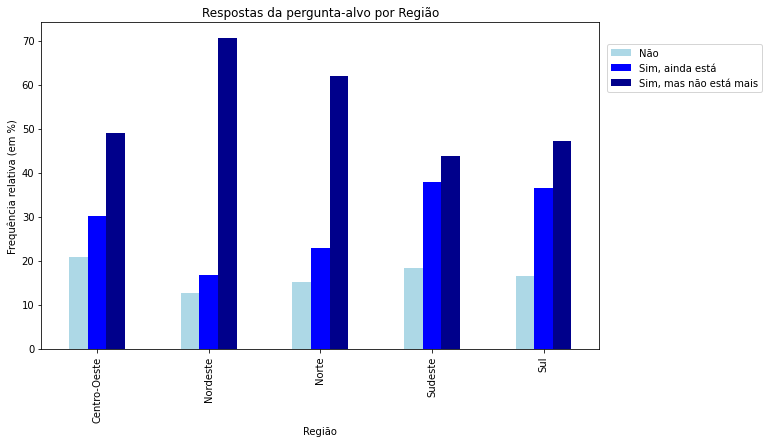

In [37]:
cores = ['lightblue', 'blue','darkblue']

endividamento_por_regiao.plot.bar(color = cores, figsize=(10, 6))
plt.ylabel('Frequência relativa (em %)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.3, 0.95)); 
plt.title('Respostas da pergunta-alvo por Região')
plt.show()

Percebemos que as tendências regionais inferidas da análise da coluna `CODUF` se mostraram verdadeiras no cenário macro, com a coluna `Região`, havendo uma maior tendência dos respondentes do Norte e Nordeste em terem se endividado mas já terem resolvido a questão, enquanto os respondentes do Centro-Oeste, Sudeste e Sul sofreram menos com endividamento mas os que se endividaram têm uma tendência maior a permanecer nessa situação.

Visto que o parâmetro `Região` trouxe insights relevantes, vamos separar suas categorias em colunas com o método *get_dummies*, a fim de facilitar a leitura posterior dos dados pelo modelo de classificação.

In [38]:
separate_regiao = pd.get_dummies(responsaveis_df['Região'])
separate_regiao.head(5)

,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,0,0,1,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [39]:
responsaveis_df.drop(['CODUF', 'Região', 'CODIBGE7'], axis='columns', inplace=True)
responsaveis_df = pd.concat([responsaveis_df, separate_regiao], axis=1)

### R01

A questão `R01` diz respeito ao sexo do respondente, tendo como opções "(1) Masculino" e "(2) Feminino". Iremos avaliar a distribuição dos respondentes por sexo e também como isso se relaciona com o perfil de endividamento.

In [40]:
responsaveis_df.R01.dtypes

dtype('int64')

In [41]:
responsaveis_df.R01 = responsaveis_df.R01.astype('category')
analysis_R01 = responsaveis_df.R01.map({1:'Masculino', 2:'Feminino'})

In [42]:
valores_sexo = analysis_R01.value_counts()
valores_sexo.to_frame()

,R01
Feminino,8042
Masculino,666


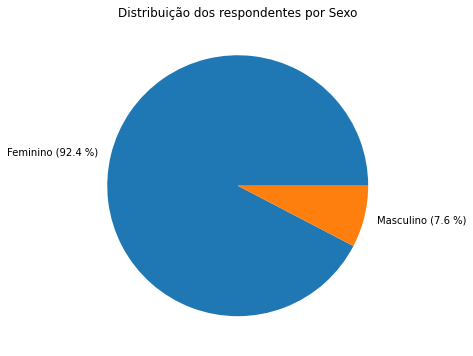

In [43]:
plt.figure(figsize=(10,6))
plt.pie(valores_sexo, labels=[f'Feminino ({valores_sexo[0]*100/sum(valores_sexo):.1f} %)', f'Masculino ({valores_sexo[1]*100/sum(valores_sexo):.1f} %)'])
plt.title('Distribuição dos respondentes por Sexo')
plt.show()

Analisando em termos da nossa variável target...

In [44]:
serasa_x_sexo = pd.crosstab(analysis_R01, responsaveis_df.R52, normalize='index').round(3)*100
serasa_x_sexo

R52,Não,"Sim, ainda está","Sim, mas não está mais"
R01,,,
Masculino,18.9,23.9,57.2
Feminino,16.7,29.4,53.9


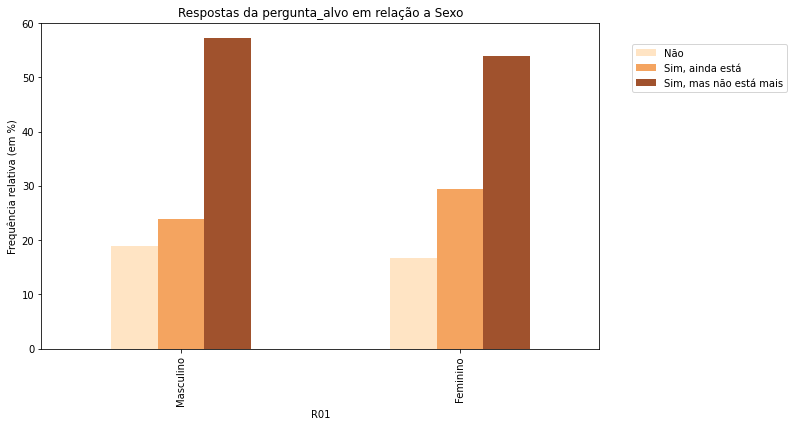

In [45]:
cores = ['bisque', 'sandybrown','sienna']

serasa_x_sexo.plot.bar(color = cores, figsize=(10, 6))
plt.ylabel('Frequência relativa (em %)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Respostas da pergunta_alvo em relação a Sexo')
plt.show()

Percebemos que a distribuição das respostas da `R52` praticamente não varia de acordo com as respostas da `R01`, então sexo deve ser um parâmetro pouco relevante.

### R02

As colunas com início `R02` dizem respeito à data de nascimento do respondente, separada em dia (`R02D`), mês (`R02M`) e ano (`R02A`). Podemos, com isso, ter alguma noção sobre como a idade pode influenciar na nossa variável target.

Analisando a coluna `R02D`, relativa ao dia:

In [46]:
responsaveis_df.R02D = responsaveis_df.R02D.astype('int64')

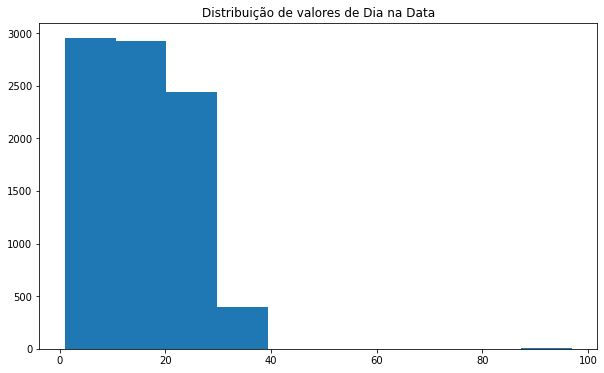

In [47]:
plt.figure(figsize=(10,6))
plt.hist(responsaveis_df.R02D)
plt.title('Distribuição de valores de Dia na Data')
plt.show()

Removendo outliers...

In [48]:
responsaveis_df = responsaveis_df[responsaveis_df['R02D'] <= 31]
responsaveis_df.shape

(8704, 473)

Analisando a distribuição dos dias no geral e relativo à target:

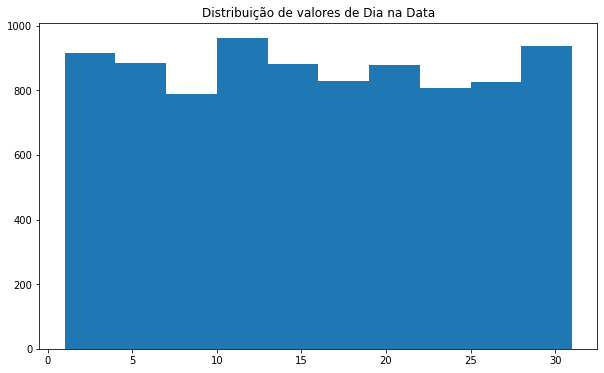

In [49]:
BINS = np.linspace(1, 31, 31)
plt.figure(figsize=(10,6))
plt.hist(responsaveis_df.R02D)
plt.title('Distribuição de valores de Dia na Data')
plt.show()

In [50]:
responsaveis_df.groupby('R52').R02D.describe()

,count,mean,std,min,25%,50%,75%,max
R52,,,,,,,,
Não,1469.0,15.345133,8.853793,1.0,8.0,15.0,23.0,31.0
"Sim, ainda está",2520.0,15.405952,8.786600,1.0,8.0,15.0,23.0,31.0
"Sim, mas não está mais",4715.0,15.479321,8.712671,1.0,8.0,15.0,23.0,31.0


Desta forma, vemos que a distribuição dos dias é aleatória, e portanto podemos considerar como irrelevante para análise e até mesmo para o DataFrame dentro do nosso objetivo de análise.

In [51]:
responsaveis_df.drop('R02D', axis='columns', inplace=True)

Agora para a coluna `R02M`, relativa ao mês...

In [52]:
responsaveis_df.R02M = responsaveis_df.R02M.astype('int64')

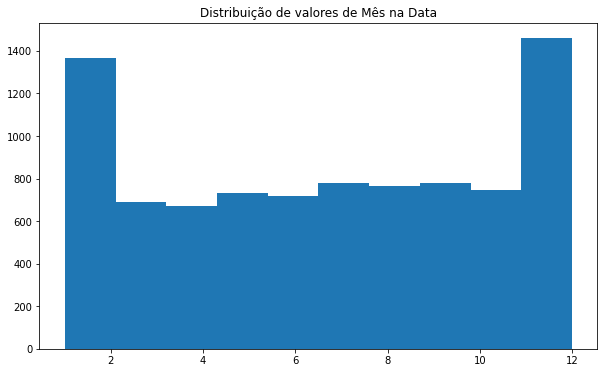

In [53]:
plt.figure(figsize=(10,6))
plt.hist(responsaveis_df.R02M)
plt.title('Distribuição de valores de Mês na Data')
plt.show()

In [54]:
responsaveis_df.groupby('R52').R02M.describe()

,count,mean,std,min,25%,50%,75%,max
R52,,,,,,,,
Não,1469.0,6.669163,3.440543,1.0,4.0,7.0,10.0,12.0
"Sim, ainda está",2520.0,6.542857,3.445450,1.0,4.0,7.0,9.0,12.0
"Sim, mas não está mais",4715.0,6.634571,3.400796,1.0,4.0,7.0,10.0,12.0


Novamente um comportamento randômico e que não se altera de acordo com as categorias da variável target, o que mostra que o mês também é um parâmetro desinteressante.

In [55]:
responsaveis_df.drop('R02M', axis='columns', inplace=True)

Para a coluna `R02A`, relativa ao ano...

In [56]:
responsaveis_df.R02A = responsaveis_df.R02A.astype('int64')

In [57]:
responsaveis_df.R02A.describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
R02A,8704.0,1976.144646,192.603831,1910.0,1965.0,1973.0,1979.0,9997.0


<Axes: >

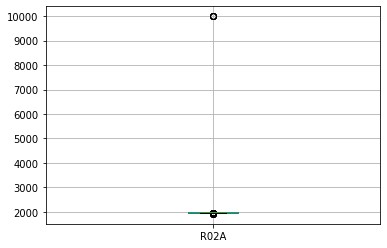

In [58]:
responsaveis_df.boxplot(column='R02A')

Removendo os outliers:

In [59]:
responsaveis_df = responsaveis_df[responsaveis_df['R02A'] <= 2011]

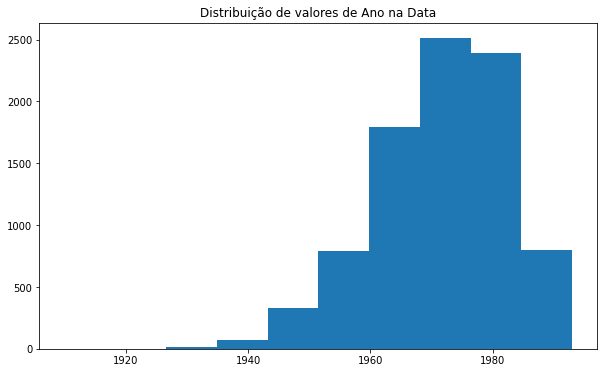

In [60]:
plt.figure(figsize=(10,6))
plt.hist(responsaveis_df.R02A)
plt.title('Distribuição de valores de Ano na Data')
plt.show()

In [61]:
responsaveis_df.groupby('R52').R02A.describe()

,count,mean,std,min,25%,50%,75%,max
R52,,,,,,,,
Não,1466.0,1971.427694,10.208570,1936.0,1965.0,1973.0,1979.0,1991.0
"Sim, ainda está",2520.0,1973.340079,9.431931,1931.0,1968.0,1975.0,1980.0,1992.0
"Sim, mas não está mais",4713.0,1970.602164,11.321332,1910.0,1963.0,1972.0,1979.0,1993.0


Por fim, a coluna `R02A` mostrou um leve desvio de valores entre as pessoas que responderam "Sim, ainda está" e "Sim, mas não está mais" na `R52`, mas nada conclusivo. É improvável que a idade seja um fator determinante para o comportamento de nossa target, mas pode exercer influência.

In [62]:
responsaveis_df.drop('R02A', axis='columns', inplace=True)

### R03

A coluna `R03` se refere às respostas da pergunta "Qual o seu Estado Civil?" que admite as respostas:

- (1) Casado (a) 
- (2) Mora junto com companheiro (a)/ amasiado (a)/ União Consensual 
- (3) Divorciado (a) / desquitado (a) ou separado (a) judicialmente 
- (4) Solteiro (a) 
- (5) Viúvo (a)

Vamos analisar seu comportamento geral e em torno da variável target.

In [63]:
responsaveis_df.R03.dtypes
responsaveis_df.R03 = responsaveis_df.R03.astype('category')

In [64]:
responsaveis_df.R03.cat.categories = ['Casado', 'União Consensual', 'Divorciado', 'Solteiro', 'Viúvo']
responsaveis_df.R03.value_counts()

Casado              3020
União Consensual    2477
Solteiro            1878
Divorciado          1000
Viúvo                324
Name: R03, dtype: int64

In [65]:
serasa_x_ec = pd.crosstab(responsaveis_df.R03, responsaveis_df.R52, normalize='index').round(3)*100
serasa_x_ec

R52,Não,"Sim, ainda está","Sim, mas não está mais"
R03,,,
Casado,15.4,21.7,62.9
União Consensual,16.8,29.4,53.7
Divorciado,18.7,34.1,47.2
Solteiro,18.6,37.8,43.6
Viúvo,14.8,26.2,59.0


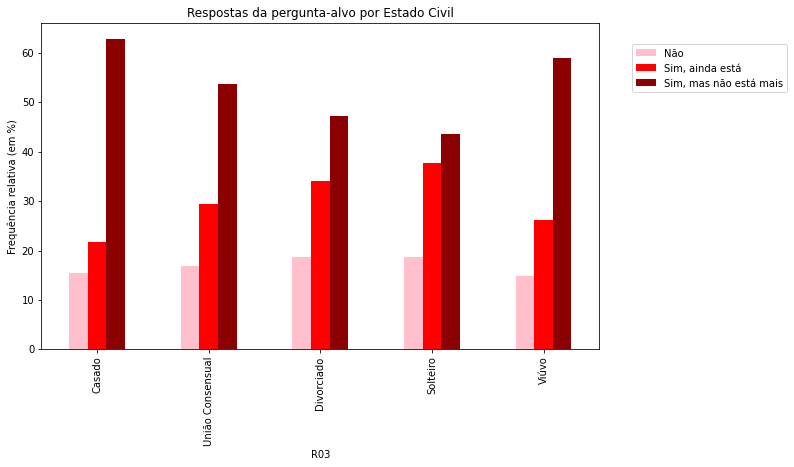

In [66]:
cores = ['pink', 'red','darkred']

serasa_x_ec.plot.bar(color = cores, figsize=(10, 6))
plt.ylabel('Frequência relativa (em %)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Respostas da pergunta-alvo por Estado Civil')
plt.show()

In [67]:
separate_R03 = pd.get_dummies(responsaveis_df.R03)
separate_R03.head(5)

,Casado,União Consensual,Divorciado,Solteiro,Viúvo
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [68]:
responsaveis_df.drop('R03', axis='columns', inplace=True)
responsaveis_df = pd.concat([responsaveis_df, separate_R03], axis=1)

### R04

A coluna `R04` diz respeito ao grau de escolaridade do respondente e admite os seguintes valores:

- (1) Nunca frequentou escola/ Analfabeto 
- (2) Até 4ª série - Ensino fundamental I 
- (3) De 5ª a 8ª série - Ensino fundamental II 
- (4) Segundo Grau, Ensino médio 
- (5) Superior

Vamos analisar seu comportamento geral e em torno da variável target.

In [69]:
responsaveis_df.R04.dtypes
responsaveis_df.R04 = responsaveis_df.R04.astype('category')

Visualizando a distribuição geral dos dados...

In [70]:
responsaveis_df.R04.cat.categories = ['Analfabeto', 'Fundamental I', 'Fundamental II', 'Ensino Médio', 'Ensino Superior']
responsaveis_df.R04.value_counts().to_frame()

,R04
Fundamental II,3031
Fundamental I,2881
Ensino Médio,1848
Analfabeto,848
Ensino Superior,91


In [71]:
serasa_x_esc = pd.crosstab(responsaveis_df.R04, responsaveis_df.R52, normalize='index').round(3)*100
serasa_x_esc

R52,Não,"Sim, ainda está","Sim, mas não está mais"
R04,,,
Analfabeto,9.3,12.4,78.3
Fundamental I,13.6,22.8,63.6
Fundamental II,19.5,35.8,44.7
Ensino Médio,20.6,35.3,44.1
Ensino Superior,23.1,23.1,53.8


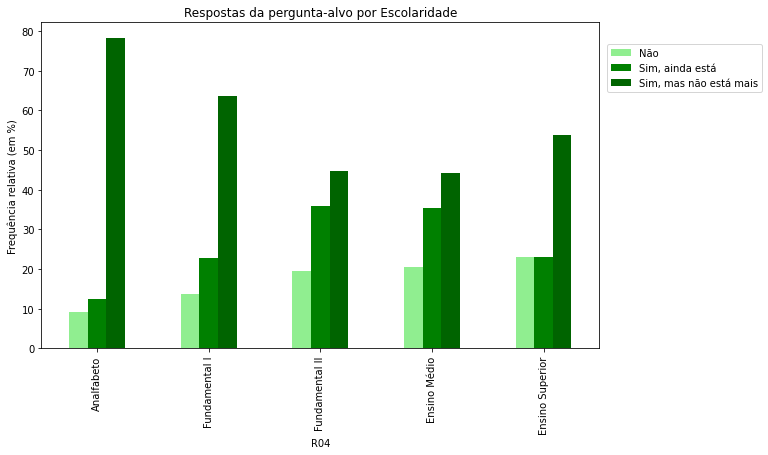

In [72]:
cores = ['lightgreen', 'green','darkgreen']

serasa_x_esc.plot.bar(color = cores, figsize=(10, 6))
plt.ylabel('Frequência relativa (em %)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.3, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Respostas da pergunta-alvo por Escolaridade')
plt.show()

Observamos que as pessoas com escolaridade igual ou superior ao ensino fundamental II têm menor chance de endividamento do que as pessoas com escolaridade inferior. Além disso, as pessoas com menor grau de escolaridade não parecem permanecer com o nome no SERASA por muito tempo, já que têm uma porcentagem muito maior de respostas com valor "Sim, mas não está mais".

Desta forma, a pergunta `R04` indica ser relevante para prever quem tem ou já teve o nome no SERASA ou não.

Dada a provável relevância da questão, vamos separar as categorias da `R04` em diferentes colunas com o médoto *get_dummies* e adicioná-las no DataFrame no lugar da coluna original para melhorar a aplicação do modelo.

In [73]:
separate_R04 = pd.get_dummies(responsaveis_df.R04)
separate_R04.head(5)

,Analfabeto,Fundamental I,Fundamental II,Ensino Médio,Ensino Superior
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [74]:
responsaveis_df.drop('R04', axis='columns', inplace=True)
responsaveis_df = pd.concat([responsaveis_df, separate_R04], axis=1)

**Apêndice**

A fim de ajudar na visualização das colunas do nosso dataframe, vamos fazer um novo dicionário:

In [75]:
nomes_colunas = [x.upper() for x in list(responsaveis_df.columns)]
responsaveis_df.columns = nomes_colunas

new_dicio = {}
for i in range(len(nomes_colunas)):
    in_car = nomes_colunas[i][0:3]
    if(in_car not in new_dicio.keys()):
        new_dicio[in_car] = [nomes_colunas[i]]
    else:
        new_dicio[in_car].append(nomes_colunas[i])
new_dicio

{'R01': ['R01'],
 'R10': ['R10A', 'R10B'],
 'R20': ['R20_01',
  'R20_02',
  'R20_03',
  'R20_04',
  'R20_05',
  'R20_06',
  'R20_07',
  'R20_08',
  'R20_09',
  'R20_10',
  'R20_11',
  'R20_12',
  'R20_13',
  'R20_14',
  'R20_15',
  'R20_16',
  'R20_17',
  'R20_18',
  'R20_98'],
 'R22': ['R22'],
 'R25': ['R25'],
 'R39': ['R39'],
 'R82': ['R82'],
 'R37': ['R37H', 'R37M'],
 'R38': ['R38H', 'R38M'],
 'R08': ['R08_01', 'R08_02', 'R08_03'],
 'R05': ['R05', 'R05A'],
 'R06': ['R06_01', 'R06_02', 'R06_03'],
 'R07': ['R07_01', 'R07_02', 'R07_03'],
 'R09': ['R09_01', 'R09_02', 'R09_03'],
 'R11': ['R11'],
 'R12': ['R12'],
 'R17': ['R17_01',
  'R17_02',
  'R17_03',
  'R17_04',
  'R17_05',
  'R17_06',
  'R17_07',
  'R17_08',
  'R17_09'],
 'R18': ['R18_01', 'R18_02', 'R18_03'],
 'R19': ['R19_01',
  'R19_02',
  'R19_03',
  'R19_04',
  'R19_05',
  'R19_06',
  'R19_07',
  'R19_08',
  'R19_09',
  'R19_10',
  'R19_11',
  'R19_12',
  'R19_13',
  'R19_14',
  'R19_15',
  'R19_16',
  'R19_17',
  'R19_18',
  '

<div id="analise-financeira"></div>

## 3.4. Analisando informações financeiras

Algumas colunas são referentes a perguntas que envolvem ganhos e gastos financeiros (salário, benefícios, auxílios, custos, etc.). Para nossa análise, vamos retornar ao dataframe `info_money`.

In [76]:
info_money = responsaveis_df.loc[:, col_money]
info_money.head(5)

,R10A,R10B,R20_01,R20_02,R20_03,R20_04,R20_05,R20_06,R20_07,R20_08,...,R20_14,R20_15,R20_16,R20_17,R20_18,R20_98,R22,R25,R39,R82
0,545.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
1,545.0,0.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,545.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


Como é um volume grande de informações e nem todas são individualmente relevantes para compreender o quesito de endividamento, vamos reinterpretar essas variáveis em termos de renda, subtraindo todos os gastos dos ganhos e construir a análise em torno disso.

Através de uma leitura do questionário, entendemos que as questões `10A`, `10B`, `20` e `22` representam recebimentos, ou seja, ganhos por salário, benefício ou auxílio. Já as questões `25`, `39` e `82` representam perdas ou custos. Vamos montar a coluna `Renda` somando os recebimentos e subtraindo os custos.

In [77]:
perdas = ['R25', 'R39', 'R82']
info_money['Renda'] = 0

for coluna in col_money:
    if coluna not in perdas:
        info_money['Renda'] += info_money[coluna]
    else:
        info_money['Renda'] -= info_money[coluna]
        
info_money.Renda.head(5)

0    623.0
1    657.0
2    102.0
3    635.0
4    128.0
Name: Renda, dtype: float64

In [78]:
responsaveis_df['Renda'] = info_money['Renda']

**Removendo outliers**

In [79]:
responsaveis_df.Renda.describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Renda,8699.0,441.703069,778.920301,-6820.0,102.0,222.0,606.0,9365.0


Text(0.5, 1.0, 'Análise de outliers da Renda')

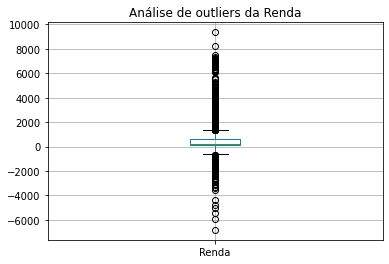

In [80]:
responsaveis_df.boxplot(column='Renda')
plt.title("Análise de outliers da Renda")

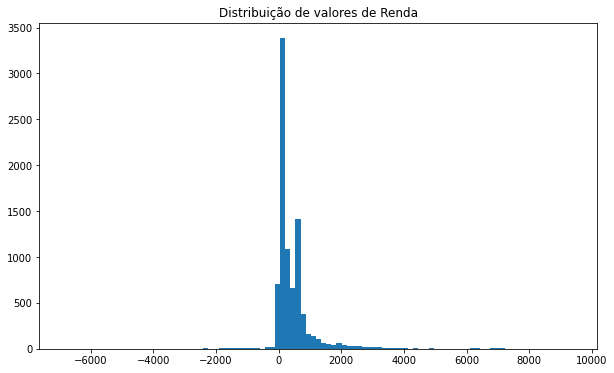

In [81]:
BINS = np.linspace(-6820, 9365, 100)
plt.figure(figsize=(10,6))
plt.hist(responsaveis_df.Renda, bins=BINS)
plt.title('Distribuição de valores de Renda')
plt.show()

Vamos utilizar como critério para remoção de outliers uma margem de 3x o intervalo interquartil (de 25% a 75%) abaixo do primeiro quartil e acima do terceiro quartil.

In [82]:
Q3 = info_money.Renda.quantile(0.75)
Q1 = info_money.Renda.quantile(0.25)
IQ = Q3 - Q1
IQ

504.0

In [83]:
lim_inf = Q1 - 3*IQ
lim_sup = Q3 + 3*IQ

responsaveis_df_dropped = responsaveis_df[responsaveis_df.Renda <= lim_sup]
responsaveis_df_dropped = responsaveis_df_dropped[(responsaveis_df_dropped.Renda >= lim_inf)]
responsaveis_df_dropped.shape

(8366, 479)

In [84]:
responsaveis_df_dropped.Renda.describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Renda,8366.0,355.847956,389.1186,-1400.0,101.0,210.0,584.0,2116.0


In [85]:
responsaveis_df = responsaveis_df_dropped

**Relacionando com a Target**

In [86]:
responsaveis_df.drop(col_money, axis=1, inplace=True)

In [87]:
responsaveis_df.groupby('R52').Renda.describe()

,count,mean,std,min,25%,50%,75%,max
R52,,,,,,,,
Não,1402.0,410.363766,430.378124,-1400.0,112.0,302.0,630.0,2106.0
"Sim, ainda está",2376.0,399.315236,419.346672,-1396.0,112.0,290.0,617.0,2116.0
"Sim, mas não está mais",4588.0,316.678509,353.662443,-1374.0,90.0,164.0,540.0,2112.0


<div id="estabelece-relevancia"></div>

## 3.5. Estabelecendo relevância

Ainda possuímos um número considerável de colunas e precisamos reduzir essa grande dimensionalidade. Logo, com o intuito de entender algumas associações de determinadas variáveis em relação ao nosso target, poderemos separar alguns blocos de perguntas (analisando pelo questionário) e aplicar o `Teste do Chi Quadrado`, sendo capaz de observar as correlações que algumas variáveis (qualitativas) tem com o target.

De primeira mão, vamos analisar plotar a correlação a partir das perguntas iniciais até finais.

In [88]:
# Primeiramente, vamos importar a funcionalidade necessária para a aplicação
from dython.nominal import associations

In [89]:
list(responsaveis_df.columns) # para enxergar melhor qual o intervalo de perguntas que podemos selecionar para a imagem do Chi Quadrado não ficar deveras poluída

['R01',
 'R37H',
 'R37M',
 'R38H',
 'R38M',
 'R08_01',
 'R08_02',
 'R08_03',
 'R05',
 'R05A',
 'R06_01',
 'R06_02',
 'R06_03',
 'R07_01',
 'R07_02',
 'R07_03',
 'R09_01',
 'R09_02',
 'R09_03',
 'R11',
 'R12',
 'R17_01',
 'R17_02',
 'R17_03',
 'R17_04',
 'R17_05',
 'R17_06',
 'R17_07',
 'R17_08',
 'R17_09',
 'R18_01',
 'R18_02',
 'R18_03',
 'R19_01',
 'R19_02',
 'R19_03',
 'R19_04',
 'R19_05',
 'R19_06',
 'R19_07',
 'R19_08',
 'R19_09',
 'R19_10',
 'R19_11',
 'R19_12',
 'R19_13',
 'R19_14',
 'R19_15',
 'R19_16',
 'R19_17',
 'R19_18',
 'R19_98',
 'R21',
 'R23_01',
 'R23_02',
 'R23_03',
 'R23_04',
 'R23_05',
 'R24',
 'R26_01',
 'R26_02',
 'R26_03',
 'R26_04',
 'R26_05',
 'R27_01',
 'R27_02',
 'R27_03',
 'R27_04',
 'R27_05',
 'R27_99',
 'R28_01',
 'R28_02',
 'R28_03',
 'R28_04',
 'R28_05',
 'R28_06',
 'R28_07',
 'R28_08',
 'R28_99',
 'R29_01',
 'R29_02',
 'R29_03',
 'R29_04',
 'R29_05',
 'R29_06',
 'R29_99',
 'R30_01',
 'R30_02',
 'R30_03',
 'R30_04',
 'R30_05',
 'R30_06',
 'R30_07',
 'R30

Colunas _5_ a _9_

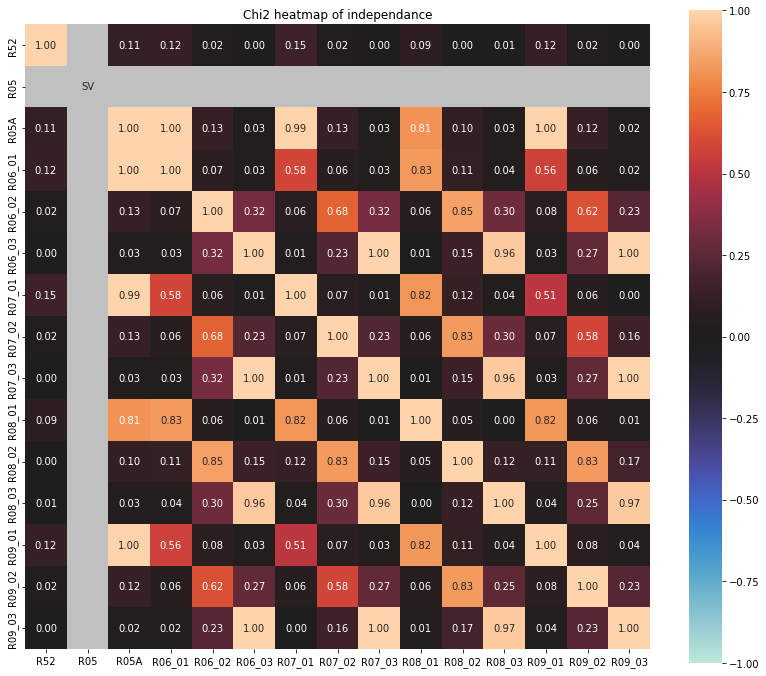

In [90]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 5
while i <= 9:
    aux = 'R0' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

        
analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _11_ a _12_

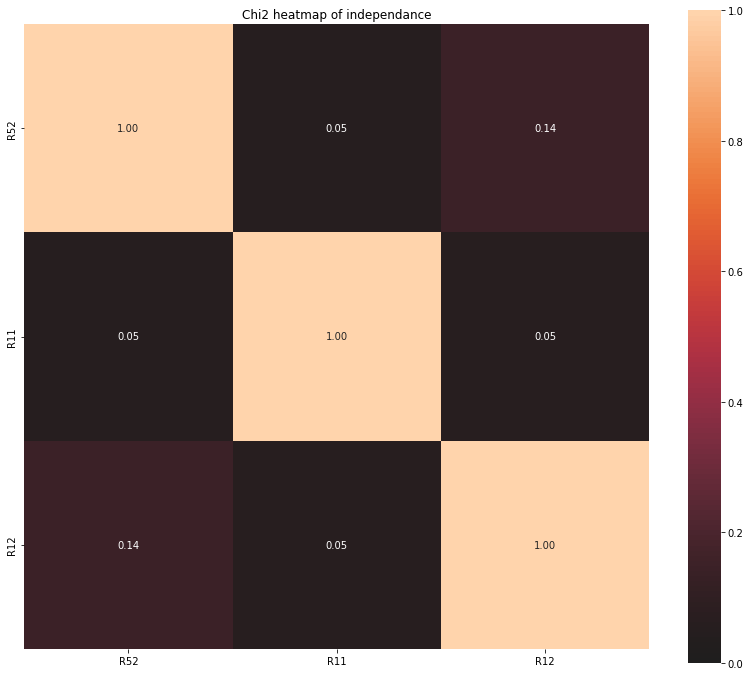

In [91]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 11
while i <= 12:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

        
analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _17_ a _18_

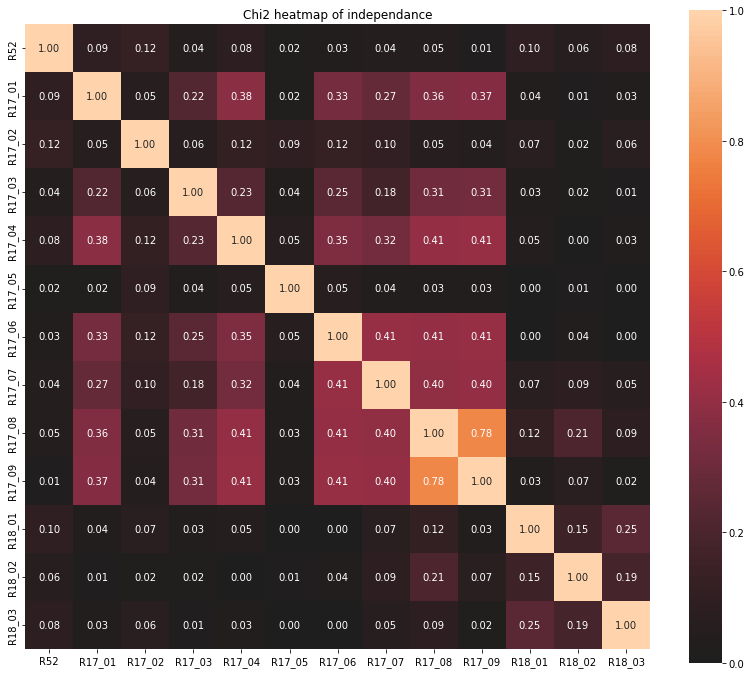

In [92]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 17
while i <= 18:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

        
analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _19_

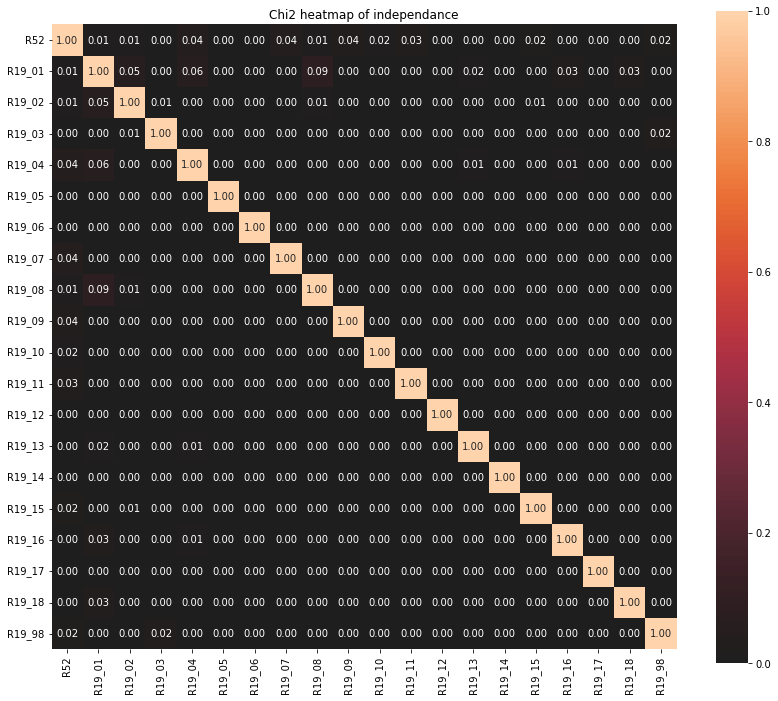

In [93]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 19
while i <= 19:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _21_ a _27_

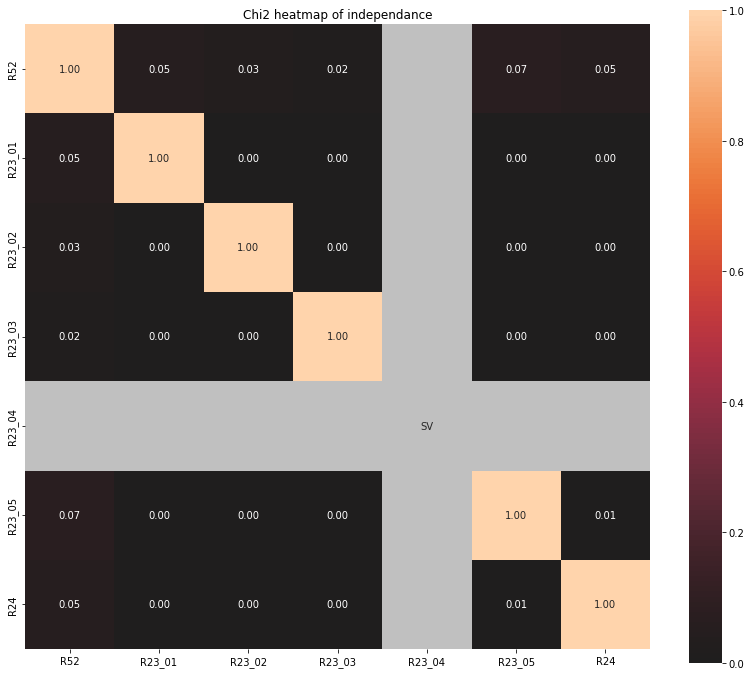

In [94]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 23
while i <= 24:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _28_ a _30_

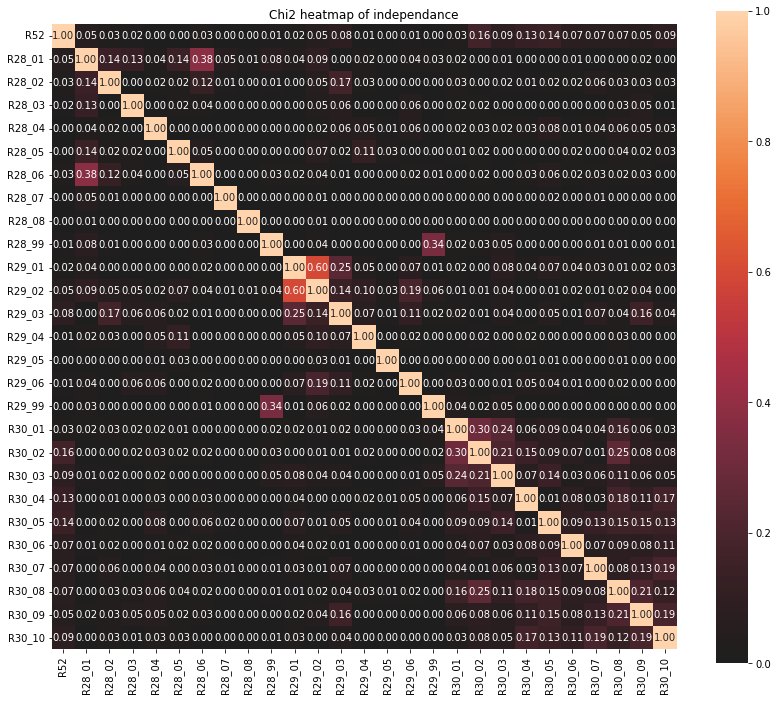

In [95]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 28
while i <= 30:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _31_ a _32_

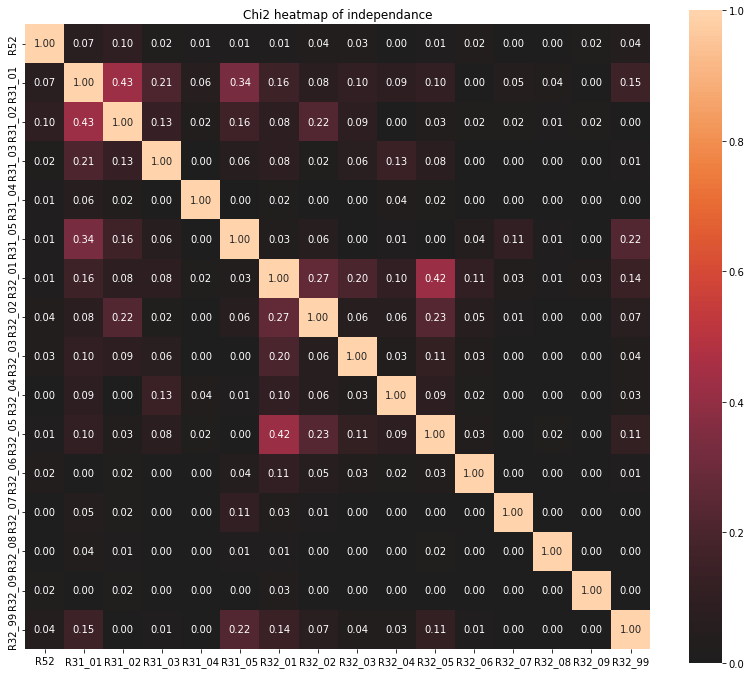

In [96]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 31
while i <= 32:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _33_ a _40_

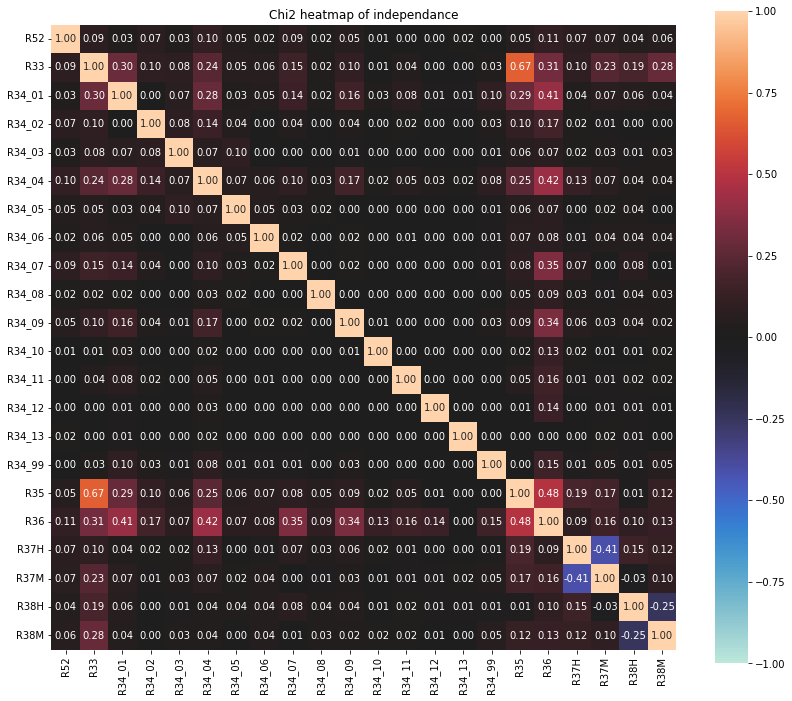

In [97]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 33
while i <= 38:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _41_ 

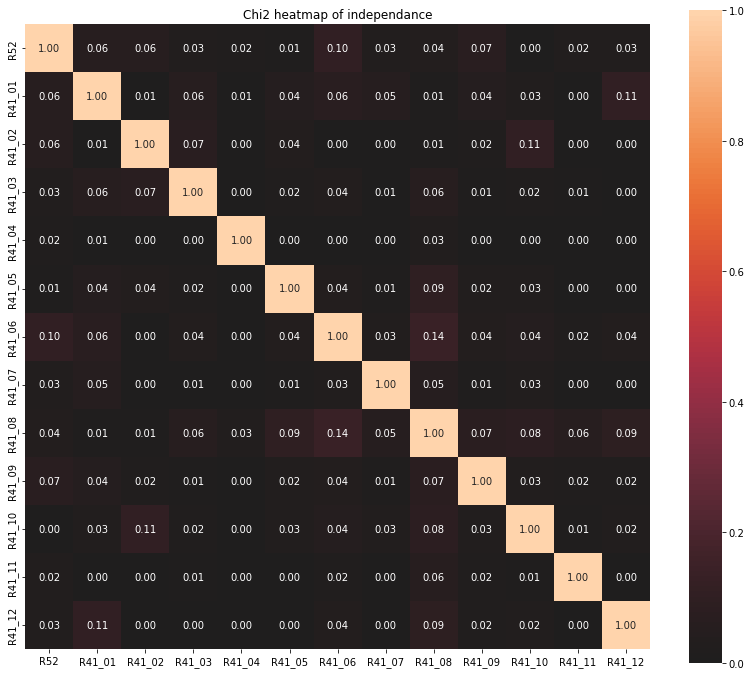

In [98]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 41
while i <= 41:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _42_ a _44_

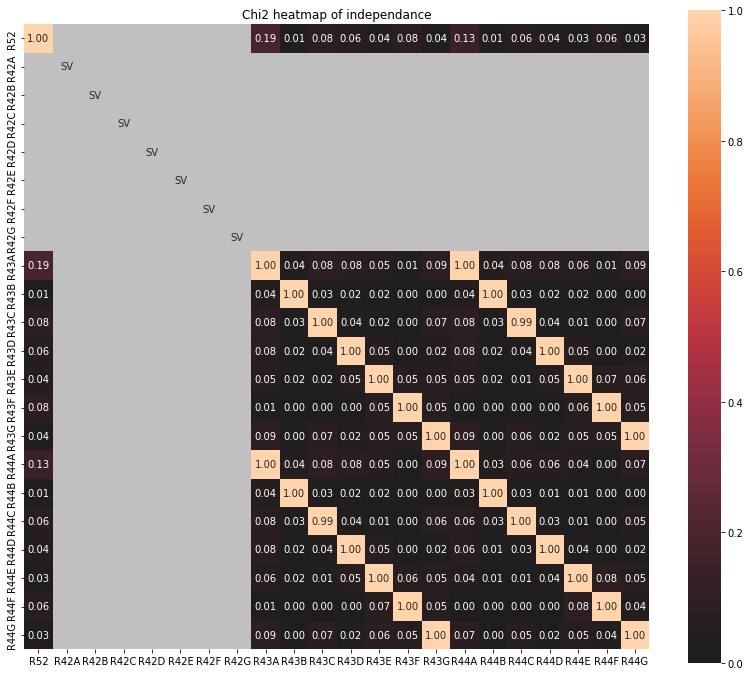

In [99]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 42
while i <= 44:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _45_

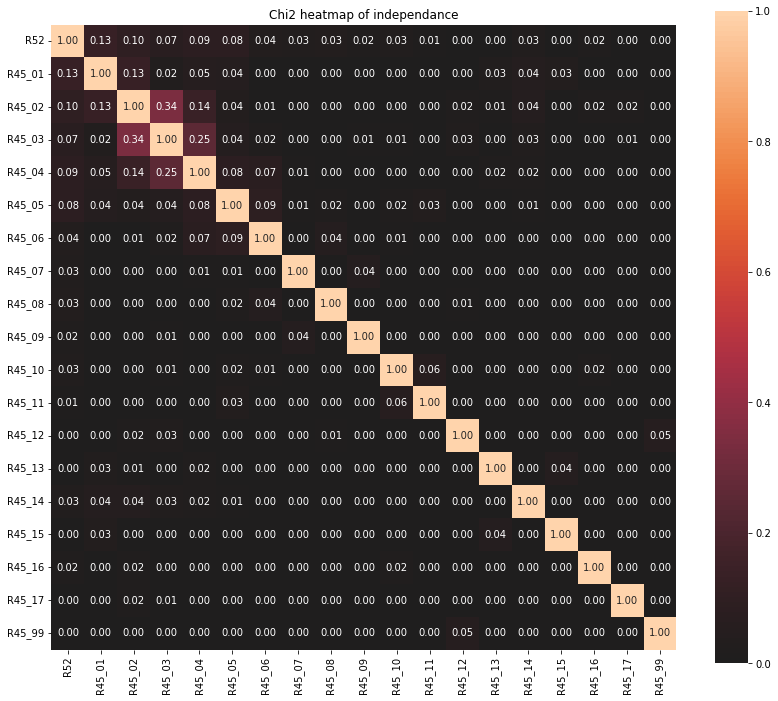

In [100]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 45
while i <= 45:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _46_ a _48_

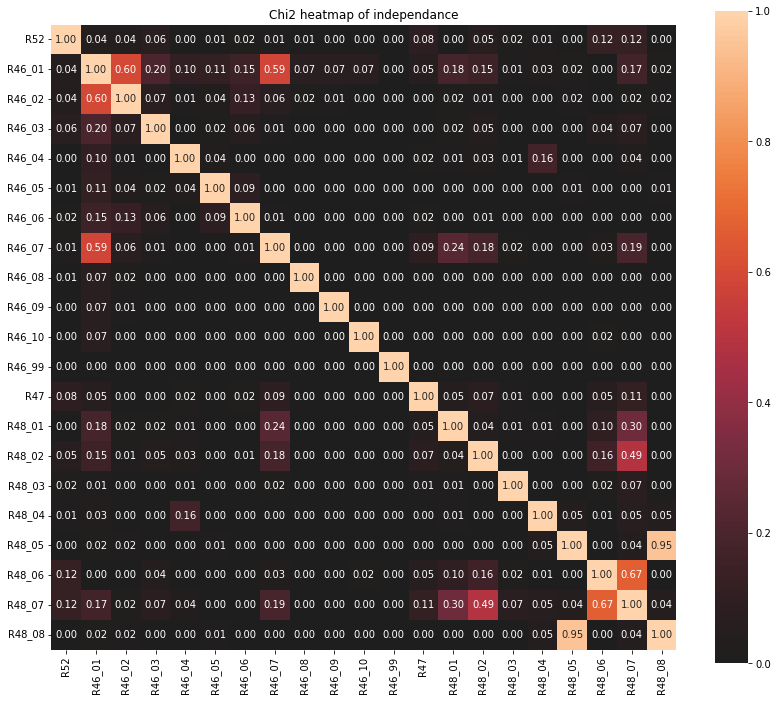

In [101]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 46
while i <= 48:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _49_

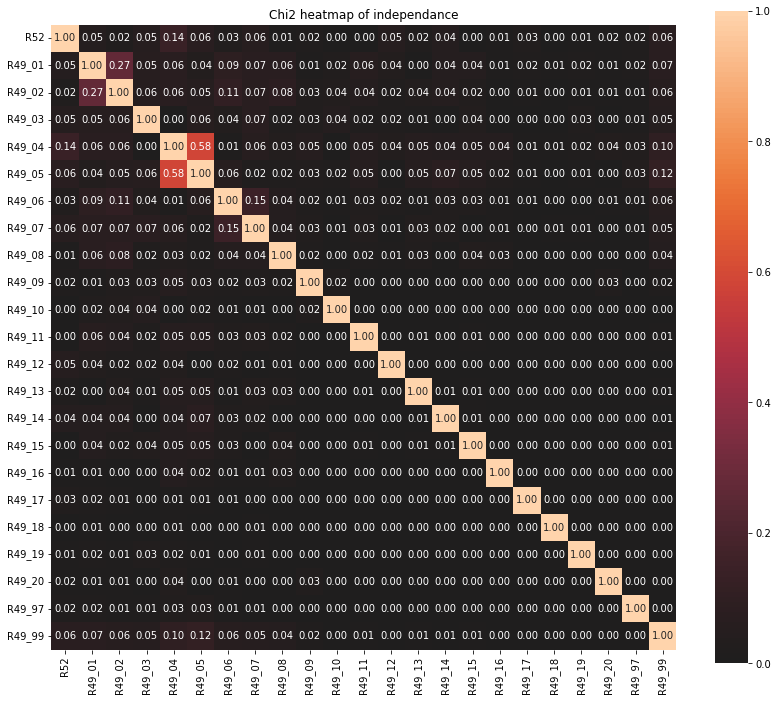

In [102]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 49
while i <= 49:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _50_ a _51_

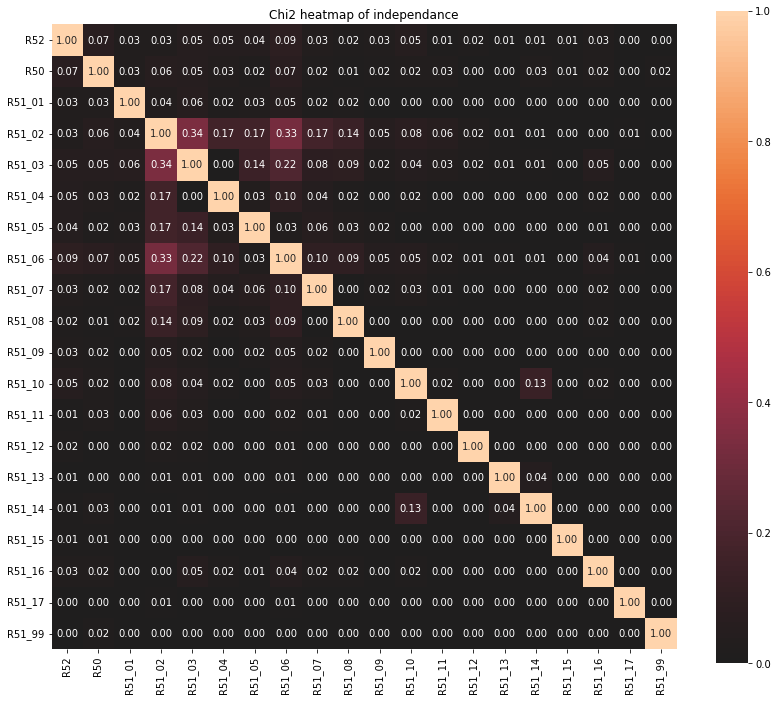

In [103]:
bloco_buscado = []
aux = ''
i = 50
while i <= 51:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _54_ a _59_

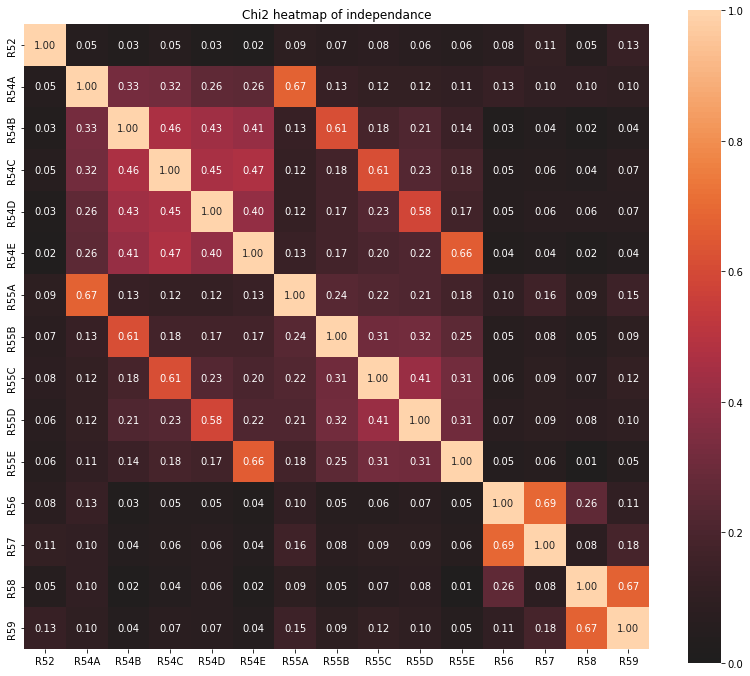

In [104]:
bloco_buscado = []
aux = ''
i = 54
while i <= 59:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _60_ a _66_

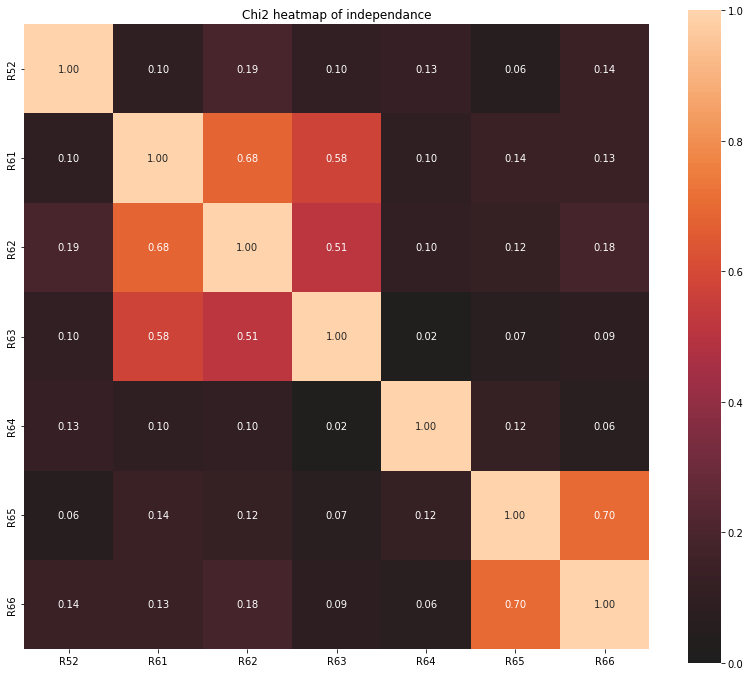

In [105]:
bloco_buscado = []
aux = ''
i = 61
while i <= 66:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _67_ a _68_

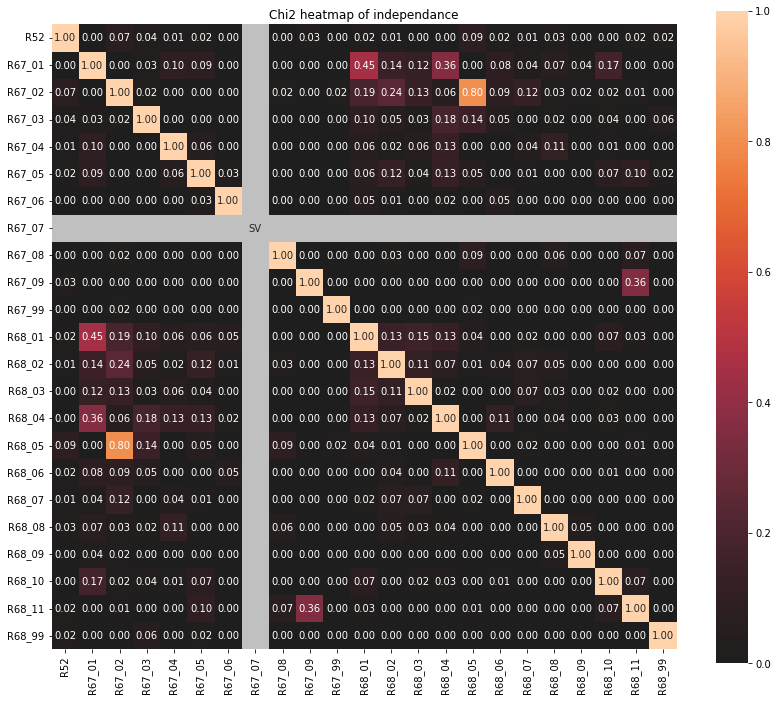

In [106]:
bloco_buscado = []
aux = ''
i = 67
while i <= 68:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _69_ a _71_

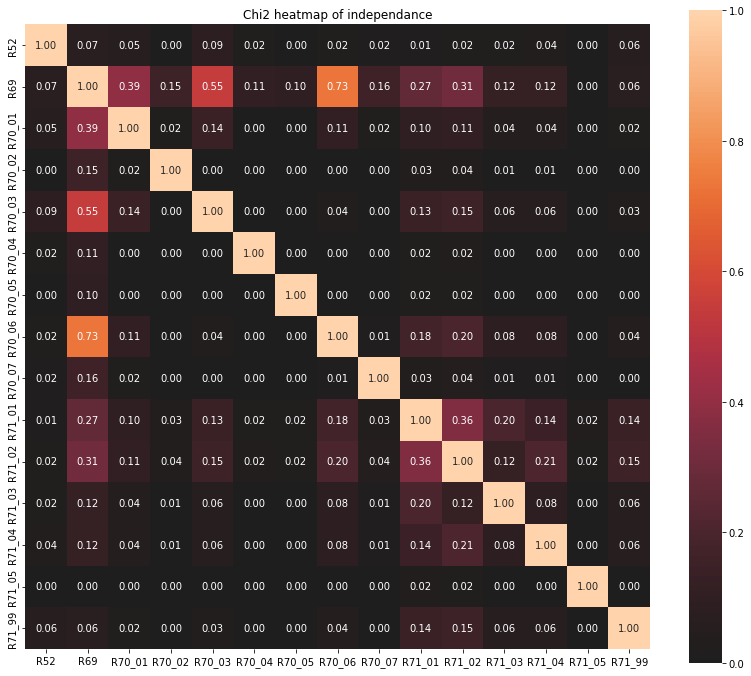

In [107]:
bloco_buscado = []
aux = ''
i = 69
while i <= 71:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _72_ a _73_

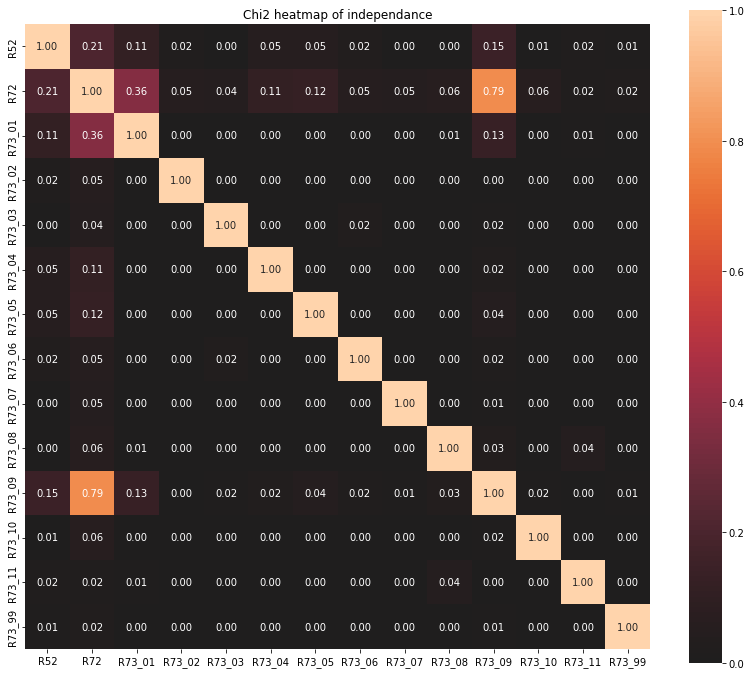

In [108]:
bloco_buscado = []
aux = ''
i = 72
while i <= 73:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _74_ a _75_

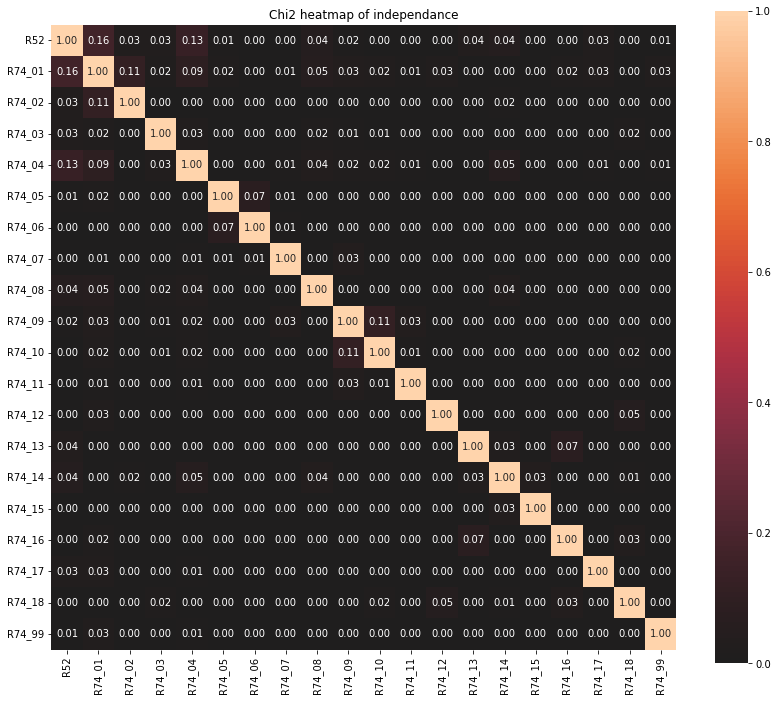

In [109]:
bloco_buscado = []
aux = ''
i = 74
while i <= 74:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _76_ a _78_

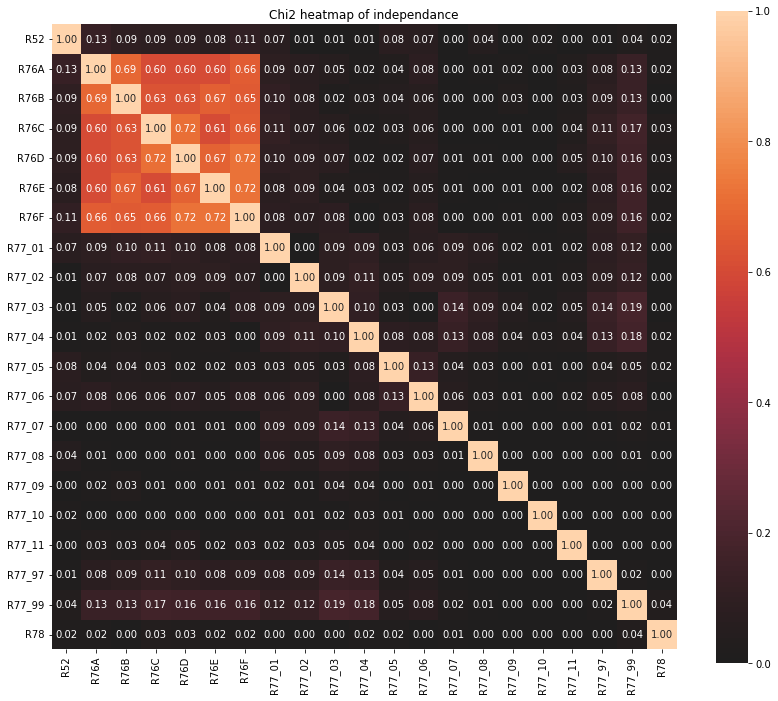

In [110]:
bloco_buscado = []
aux = ''
i = 76
while i <= 78:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _79_ a _82_

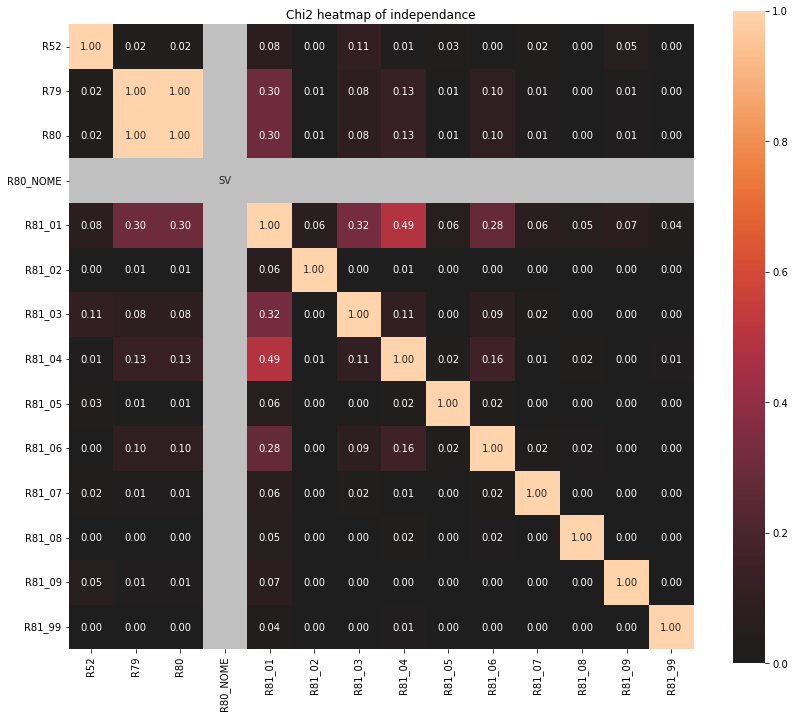

In [111]:
bloco_buscado = []
aux = ''
i = 79
while i <= 81:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _83_ a _86_

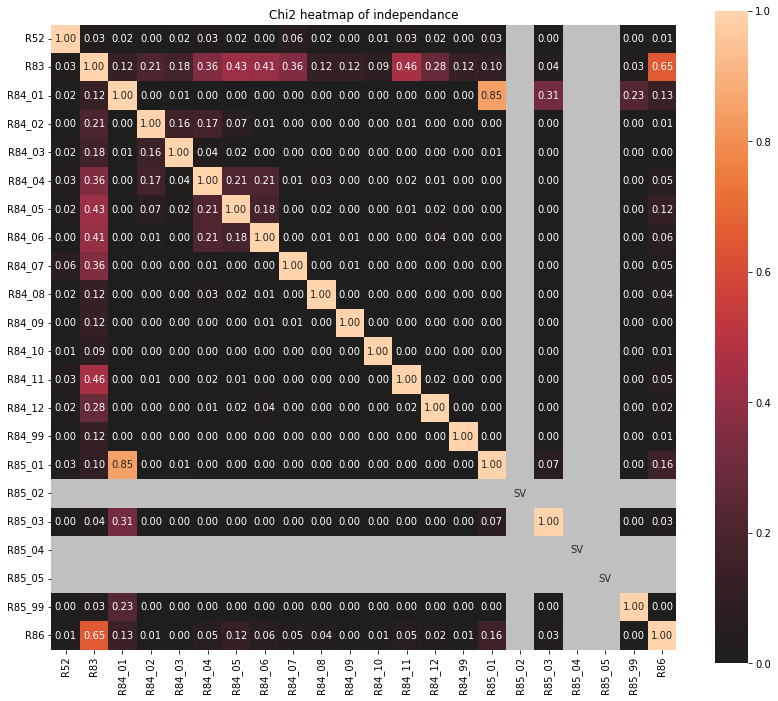

In [112]:
bloco_buscado = []
aux = ''
i = 83
while i <= 86:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _87_ a _90_

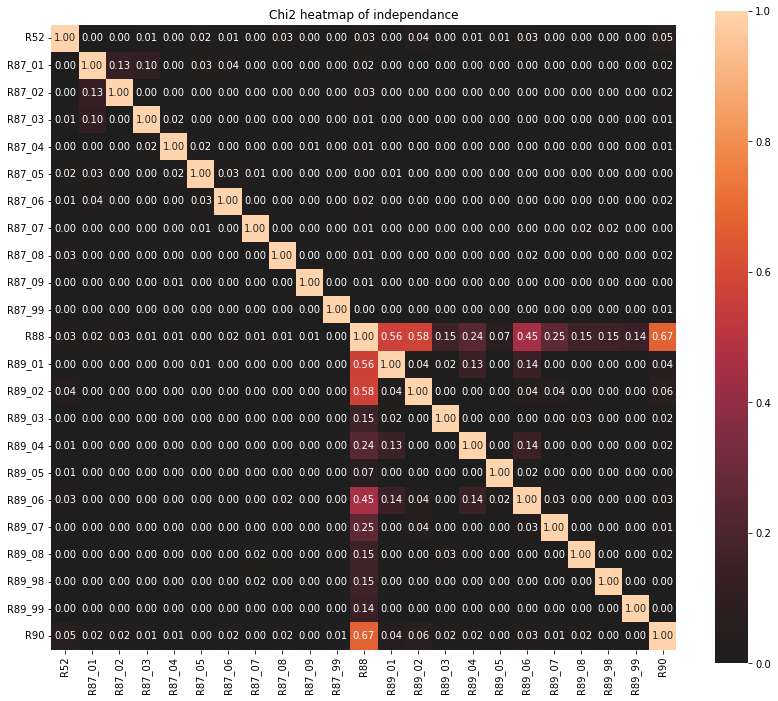

In [113]:
bloco_buscado = []
aux = ''
i = 87
while i <= 90:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _91_ a _94_

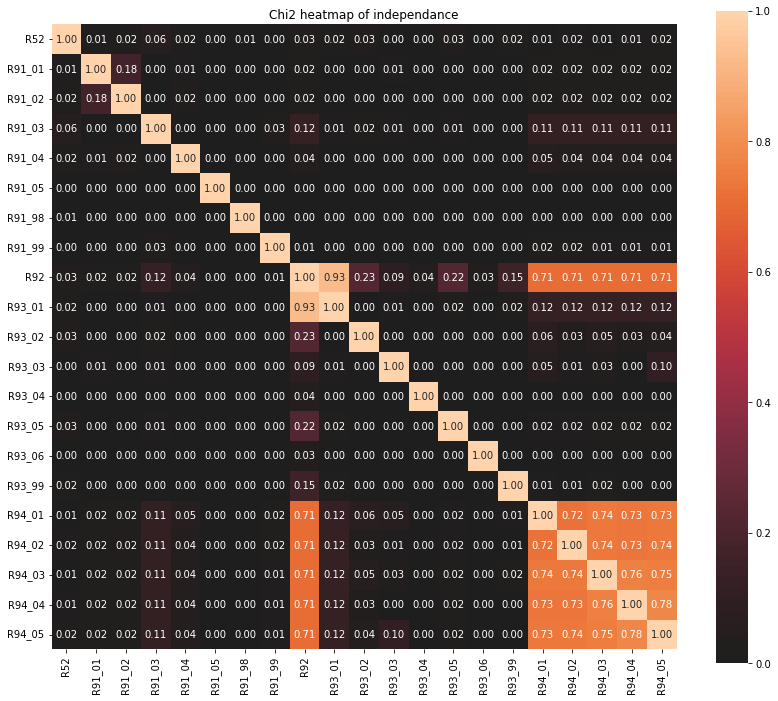

In [114]:
bloco_buscado = []
aux = ''
i = 91
while i <= 94:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

De forma geral, não se foi possível obter muitas conclusões a partir dos testes. Então precisamo

**Aplicando mais dummies**

Para perguntas que tem diferentes respostas e que não já foram divididas como várias outras perguntas, nós dividiremos aplicando o método `get_dummies`.

In [115]:
colunas_isoladas = ['R11','R12','R21','R24','R33','R35','R36','R40','R47','R50','R56','R57','R58','R59','R61','R62','R63','R64','R65','R66','R69','R72','R78','R79','R83','R86','R88','R90','R92']
for coluna in colunas_isoladas:
    num_valores = np.arange(1, len(responsaveis_df[coluna].value_counts())+1, 1)
    responsaveis_df[coluna].cat.categories = [f"{coluna}_{x}" for x in num_valores]
    novo_df = pd.get_dummies(responsaveis_df[coluna])
    responsaveis_df.drop(coluna, axis='columns', inplace=True)
    responsaveis_df = pd.concat([responsaveis_df, novo_df], axis=1)

**Apêndice**

A fim de ajudar na visualização das colunas do nosso dataframe, vamos fazer um novo dicionário:

In [116]:
nomes_colunas = [x.upper() for x in list(responsaveis_df.columns)]
responsaveis_df.columns = nomes_colunas

new_dicio = {}
for i in range(len(nomes_colunas)):
    in_car = nomes_colunas[i][0:3]
    if(in_car not in new_dicio.keys()):
        new_dicio[in_car] = [nomes_colunas[i]]
    else:
        new_dicio[in_car].append(nomes_colunas[i])
new_dicio

{'R01': ['R01'],
 'R37': ['R37H', 'R37M'],
 'R38': ['R38H', 'R38M'],
 'R08': ['R08_01', 'R08_02', 'R08_03'],
 'R05': ['R05', 'R05A'],
 'R06': ['R06_01', 'R06_02', 'R06_03'],
 'R07': ['R07_01', 'R07_02', 'R07_03'],
 'R09': ['R09_01', 'R09_02', 'R09_03'],
 'R17': ['R17_01',
  'R17_02',
  'R17_03',
  'R17_04',
  'R17_05',
  'R17_06',
  'R17_07',
  'R17_08',
  'R17_09'],
 'R18': ['R18_01', 'R18_02', 'R18_03'],
 'R19': ['R19_01',
  'R19_02',
  'R19_03',
  'R19_04',
  'R19_05',
  'R19_06',
  'R19_07',
  'R19_08',
  'R19_09',
  'R19_10',
  'R19_11',
  'R19_12',
  'R19_13',
  'R19_14',
  'R19_15',
  'R19_16',
  'R19_17',
  'R19_18',
  'R19_98'],
 'R23': ['R23_01', 'R23_02', 'R23_03', 'R23_04', 'R23_05'],
 'R26': ['R26_01', 'R26_02', 'R26_03', 'R26_04', 'R26_05'],
 'R27': ['R27_01', 'R27_02', 'R27_03', 'R27_04', 'R27_05', 'R27_99'],
 'R28': ['R28_01',
  'R28_02',
  'R28_03',
  'R28_04',
  'R28_05',
  'R28_06',
  'R28_07',
  'R28_08',
  'R28_99'],
 'R29': ['R29_01', 'R29_02', 'R29_03', 'R29_04',

**Importância de Features**

Note que após a aplicação dos Testes do Chi Quadrado em nosso dataframe, em geral, se você observar bem, poucas conclusões conseguimos tirar haja vista que as correlações se permanecem baixas, dificultando a possibilidade de estabelecer uma regra a seguir em quesito de filtrar as features. 

No entanto, não é o fim. Nosso próximo passo será utilizar brevemente o modelo de Árvore de Decisão (Decision Tree), não para treiná-lo já (até porque nem concluímos nossa análise exploratória e muito menos dividimos os conjuntos de treino e teste), mas com o intuito de usufruir de uma certa funcionalidade que o classificador possui.

- `feature_importances_`: ela retorna uma medida de importância relativa de cada feature usado no treinamento do modelo. Essa pontuação indica o quanto cada recurso é relevante para fazer previsões precisas. 

Logo, uma vez que usamos o dataset das features qualitativas e demográficas, conseguimos obter então quais as features mais relevantes em relação à previsão do nosso _Target_, o que facilita a seleção de features. Portanto, podemos priorizar as 10 features mais importantes do nosso Dataframe, nos dando a capacidade de ter insights ainda melhores e podendo ser capaz de melhorar o desempenho do nosso modelo. Vale lembrar que utilizaremos apenas em consideração as categóricas.

In [174]:
info_demografico = responsaveis_df.loc[:, ['CASADO', 'UNIÃO CONSENSUAL', 'DIVORCIADO', 'SOLTEIRO', 'VIÚVO', 'ANALFABETO', 'FUNDAMENTAL I', 'FUNDAMENTAL II', 'ENSINO MÉDIO', 'ENSINO SUPERIOR']]
for coluna in list(info_demografico.columns):
        info_demografico[coluna] = info_demografico[coluna].astype('category')
        
nao_cat = ['RENDA','R10A', 'R10B', 'R20_01', 'R20_02', 'R20_03', 'R20_04', 'R20_05', 'R20_06', 'R20_07', 'R20_08', 'R20_09', 'R20_10', 'R20_11', 'R20_12', 'R20_13', 'R20_14', 'R20_15', 'R20_16', 'R20_17', 'R20_18', 'R20_98', 'R22', 'R25', 'R39', 'R82', 'R37H', 'R37M', 'R38H', 'R38M', 'R08_01', 'R08_02', 'R08_03', 'CENTRO-OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL', 'CASADO', 'UNIÃO CONSENSUAL', 'DIVORCIADO', 'SOLTEIRO', 'VIÚVO', 'ANALFABETO', 'FUNDAMENTAL I', 'FUNDAMENTAL II', 'ENSINO MÉDIO', 'ENSINO SUPERIOR']
categoricas = []
for list_column in new_dicio.values():
    for column in list_column:
        if column not in nao_cat:
            categoricas.append(column)

info_categoricas = responsaveis_df.loc[:, categoricas]

In [175]:
info_cat_demog = pd.concat([info_categoricas, info_demografico], axis=1)

In [176]:
from sklearn.tree import DecisionTreeClassifier # Importando o modelo de classificação

X = info_cat_demog.drop(["R52"], axis=1)
Y = info_cat_demog['R52']
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,Y)

DecisionTreeClassifier(random_state=0)

In [178]:
features_imp = pd.DataFrame({"feature":X.columns,"importance":clf.feature_importances_})
features_imp.sort_values("importance", ascending=False).head(9)

,feature,importance
471,R62_1,0.036258
493,R72_1,0.020726
6,R07_01,0.013694
487,R66_1,0.013134
404,R12_1,0.013028
523,FUNDAMENTAL II,0.011737
76,R30_02,0.011610
9,R09_01,0.011273
479,R64_2,0.010652


Geralmente, o método feature_importances_ retorna um array em que cada elemento corresponde a um recurso e representa a importância desse recurso. As pontuações são normalizadas, ou seja, somam 1. Isso permite que você compare as importâncias relativas entre os recursos. No entanto, analisar dessa forma não ajudará muito, mas decidimos apenas mostrar para entender um pouco mais.

In [179]:
# clf.feature_importances_

Por fim, vamos separar então as 10 features mais importantes segundo o modelo.

In [180]:
more_relevant_10 = ['R62_1', 'R72_1', 'R12_1', 'R17_02', 'R76A', 'R09_01', 'R66_1', 'R64_2', 'FUNDAMENTAL II' ] # em ordem de relevancia
top_features = responsaveis_df.loc[:, more_relevant_10 + ['R52']]
top_features

,R62_1,R72_1,R12_1,R17_02,R76A,R09_01,R66_1,R64_2,FUNDAMENTAL II,R52
0,0,0,0,1,1,4,0,1,0,"Sim, ainda está"
1,0,1,0,1,1,4,0,1,1,"Sim, ainda está"
2,0,0,0,97,1,99,0,1,1,"Sim, mas não está mais"
3,0,1,1,97,1,4,0,1,1,"Sim, mas não está mais"
4,0,0,1,1,1,99,0,1,0,"Sim, mas não está mais"
...,...,...,...,...,...,...,...,...,...,...
8822,0,0,0,2,1,99,0,1,0,"Sim, mas não está mais"
8823,0,0,0,1,1,99,1,1,0,"Sim, ainda está"
8824,0,0,1,97,1,99,0,1,0,"Sim, mas não está mais"
8825,0,0,1,1,2,5,0,1,0,"Sim, mas não está mais"


<div id="aplicando-modelo"></div>

# 4. Aplicação do modelo

<div id="treino-teste"></div>

## 4.1. Separando conjunto de treino e teste

Note que para avaliarmos o quão a nossa seleção é relevante para a classificação com base em nossa pergunta, será necessário separar conjuntos de treinos e testes tanto do dataframe `top_features` quanto do `responsaveis_df` e comparar a eficácia de previsão de ambos. 

Separando os conjuntos de treino e teste de `top_features`:

In [181]:
# Dividindo o que é feature e o que é target
X_top = top_features.drop('R52', axis=1)
Y_top = top_features['R52']

# Vamos agora dividir os conjuntos de treinamento e teste
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_top, Y_top, test_size=0.2, random_state=42)

Separando os conjuntos de treino e teste de `responsaveis_df`:

In [169]:
# Dividindo o que é feature e o que é target
X_resp = responsaveis_df.drop('R52', axis=1)
Y_resp = responsaveis_df['R52']

# Vamos agora dividir os conjuntos de treinamento e teste
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_resp, Y_resp, test_size=0.2, random_state=42)

Agora possuímos quatro conjuntos separados para cada um dos dataframes: 

- **Xi_train**: features de treinamento
- **Xi_test**: features de teste
- **Yi_train**: target de treinamento
- **Yi_test**: target de teste

<div id="decision-tree"></div>

## 4.2. Treinando o modelo `DecisionTreeClassifier`

- `DecisionTreeClassifier`: Um algoritmo de árvore de decisão é uma técnica de aprendizado de máquina supervisionado que constrói uma estrutura em forma de árvore para tomar decisões ou classificar dados. Este algoritmo busca dividir os dados em subconjuntos com maior homogeneidade para melhorar a performance da classificação (no nosso caso) ou da regressão (em outros casos).
- Primeiramente o algoritmo começa selecionando um atributo - que pode ser uma coluna do DataFrame - que melhor divida a base de dados, isso é feito a partir de métodos estatísticos que a máquina possui. Na sequência, os dados são divididos em subconjuntos com base naquele atributo, e esses subconjuntos vão formar um nó da árvore. Esse processo é repetido recursivamente até que haja um ponto de parada (que pode ser quando os dados não são mais segmentáveis em subconjuntos).
- A partir da árvore construída, pode-se fazer o fit, ou seja, entregar um novo DataFrame para o algoritmo e ele percorrerá os galhos da árvore a fim de tomar uma decisão sobre como aquele dado deve ser categorizado dentro das possibilidades da variável Target.

Como o `DecisionTree` já foi importado, não será necessária a importação do modelo novamente. Enfim, agora, somos capazes de treinar ambos os dataframes com o método `fit` do mesmo.

Treinando o conjunto de `top_features`:

In [170]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X1_train, Y1_train)

DecisionTreeClassifier(random_state=0)

In [171]:
Y1_predict = pd.Series(tree_clf.predict(X1_test))
Y1_predict.to_frame()

,0
0,"Sim, ainda está"
1,"Sim, ainda está"
2,"Sim, ainda está"
3,"Sim, mas não está mais"
4,"Sim, ainda está"
...,...
1669,Não
1670,"Sim, mas não está mais"
1671,"Sim, ainda está"
1672,"Sim, ainda está"


In [172]:
Y1_test.to_frame()

,R52
2535,"Sim, ainda está"
7196,"Sim, mas não está mais"
5302,"Sim, mas não está mais"
6076,"Sim, mas não está mais"
6980,"Sim, mas não está mais"
...,...
2075,"Sim, mas não está mais"
2468,"Sim, mas não está mais"
5208,"Sim, ainda está"
5778,"Sim, ainda está"


Para podermos comparar as previsões com os rótulos reais, vamos utilizar a função que calcula acurácia de previsão de um modelo, da biblioteca Skicit-Learn, `accuracy_score`.

In [173]:
from sklearn.metrics import accuracy_score
accuracy_topDT = accuracy_score(Y1_test, Y1_predict)

print(f'Acurácia: {accuracy_topDT}')

Acurácia: 0.4946236559139785


Wow! Aproximadamente 59% de acurácia. Não chega a ser um número absurdo, mas está longe de ser um número ruim. Agora, antes de tentarmos aplicar métodos que nos tragam um melhor coeficiente de desemepenho, vamos comparar com os resultados que vão ser obtidos para o dataframe inteiro.

Treinando o conjunto `responsaveis_df`:

In [129]:
resp_clf = DecisionTreeClassifier(random_state=0)
resp_clf.fit(X2_train, Y2_train)

DecisionTreeClassifier(random_state=0)

In [130]:
Y2_predict = pd.Series(resp_clf.predict(X2_test))
Y2_predict.to_frame()

,0
0,"Sim, ainda está"
1,"Sim, mas não está mais"
2,"Sim, mas não está mais"
3,"Sim, mas não está mais"
4,Não
...,...
1669,"Sim, ainda está"
1670,"Sim, mas não está mais"
1671,"Sim, mas não está mais"
1672,"Sim, ainda está"


In [131]:
Y2_test.to_frame()

,R52
2535,"Sim, ainda está"
7196,"Sim, mas não está mais"
5302,"Sim, mas não está mais"
6076,"Sim, mas não está mais"
6980,"Sim, mas não está mais"
...,...
2075,"Sim, mas não está mais"
2468,"Sim, mas não está mais"
5208,"Sim, ainda está"
5778,"Sim, ainda está"


In [132]:
accuracy_resp = accuracy_score(Y2_test, Y2_predict)

print(f'Acurácia: {accuracy_resp}')

Acurácia: 0.501194743130227


Observe que a acurácia do modelo aplicado na seleção feita, isto é, no `top_features`, é maior do que a acurácia do modelo aplicado no dataframe inteiro (`responsaveis_df`), o que nos dá indícios de que a seleção tem papel mais relevante na hora da classificação.

<div id="random-forest"></div>

## 4.3. Treinando o `RandomForestClassifier`

- `RandomForest`: Random Forest nada mais é do que um algoritmo de aprendizado de máquina que usa um conjunto de árvores de decisão para realizar classificação. Ele é conhecido como "floresta" porque é composto por várias árvores de decisão combinadas. Primeiro, treinamos o Random Forest usando um conjunto de dados de treinamento. O algoritmo cria várias árvores de decisão diferentes usando diferentes combinações de características.
- Cada árvore de decisão é construída seguindo uma lógica parecida com um jogo de perguntas e respostas. Por exemplo, imagine um classificador que venha prever a probabilidade de uma pessoa gostar ou não de um filme, uma árvore pode começar perguntando: "A pessoa tem menos de 30 anos?". Dependendo da resposta (sim ou não), a árvore segue por diferentes caminhos com mais perguntas.
- O aspecto "aleatório" do Random Forest existe por conta de que cada árvore é construída com uma amostra aleatória de dados de treinamento e com um subconjunto aleatório de características disponíveis. Essa aleatoriedade ajuda a evitar que todas as árvores sejam muito parecidas umas com as outras.
- Após construir todas as árvores de decisão, o Random Forest faz a classificação combinando as respostas de todas as árvores. No caso de classificação, as árvores votam em suas previsões e a classe mais votada é considerada a classificação final do modelo.
- Por fim, depois de treinar o Random Forest, pode ser utilizado para fazer previsões em novos dados. O modelo analisa as características do novo dado e passa por cada uma das árvores de decisão. Em seguida, combina as previsões de todas as árvores e determina a classe final.
- Uma vantagem do Random Forest é que ele é capaz de lidar com dados complexos e não requer muita preparação dos dados. Além disso, ele tende a ser mais a prova de overfitting (quando o modelo se ajusta demais aos dados de treinamento e não generaliza bem para novos dados) em comparação com uma única árvore de decisão.

Agora, vamos aplicar o modelo `RandomForest`e observar como ele se sai em relação ao dataframe de `top_features`.

In [133]:
from sklearn.ensemble import RandomForestClassifier
# Criando uma instância e treinando o modelo
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=10)
forest_clf.fit(X1_train,  Y1_train)

# Predizendo
Y1_predict = pd.Series(forest_clf.predict(X1_test))

In [134]:
accuracy_topRF = accuracy_score(Y1_test, Y1_predict)

print(f'Acurácia: {accuracy_topRF}')

Acurácia: 0.5997610513739546


<div id="naive-bayes"></div>

## 4.4. Treinando o `Naive-Bayes`

`Classificador de Naive-Bayes`: é um algoritmo utilizado em aprendizado de máquina para classificar dados. Ele é baseado no Teorema de Bayes, que é uma fórmula matemática usada para calcular a probabilidade de um evento ocorre.

Primeiro, treinamos o classificador usando um conjunto de dados de treinamento, O algoritmo analisa esses dados e calcula as probabilidades de cada dado aparecer. Essas probabilidades são chamadas de probabilidades condicionais.

Aqui entra um detalhe do algoritmo. O Naive-Bayes parte do pressuposto de que os dados são independentes entre si, ou seja, a presença de um dado não afeta a presença do outro. Essa suposição é muitas vezes irrealista na prática, mas é uma simplificação útil para simplificar o cálculo de probabilidades.

Após o treinamento, podemos usar o classificador para classificar novos dados desconhecidos. Ele analisa esses dados (geralmente contidos numa tabela de dados), calcula as probabilidades condicionais e aplica o Teorema de Bayes para obter a probabilidade posterior. Em seguida, ele classifica o dado com base na maior probabilidade.

Uma vantagem desse classificador é que ele é rápido e só precisa de uma quantidade pequena de dados de treinamento para obter resultados aceitável. Porém, ele pode ter problemas quando os dados não são realmente independentes ou quando não tem dados suficientes para treinamento.

**Aplicando o modelo**

Agora, vamos aplicar o modelo `Naive-Bayes`e observar como ele se sai em relação ao dataframe de `top_features`.

In [187]:
from sklearn.naive_bayes import MultinomialNB
# Criando uma instância e treinando o modelo
bayes_clf = MultinomialNB() # Multinomial pois ela trabalha com valores discretos, enquanto a Gaussian trabalha com valores contínuos.
bayes_clf.fit(X1_train,  Y1_train)

# Predizendo
Y1_predict = pd.Series(bayes_clf.predict(X1_test))

C:\Users\samue\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
C:\Users\samue\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [136]:
accuracy_topNB = accuracy_score(Y1_test, Y1_predict)

print(f'Acurácia: {accuracy_topNB}')

Acurácia: 0.43608124253285546


Escrever alguma coisa

<div id="analise-desempenho"></div>

# 5. Análise de desempenho

<div id="cross-validation"></div>

## 5.1. Implementando a Validação Cruzada (K-Folds)

Uma boa forma de avaliar o nosso modelo é utilizando o método da validação cruzada. Nesta primeira etapa, usaremos a função `cross_val_score()` com o método do _k-fold_ de validação cruzada em 6 partes, isto é, vamos dividir o conjunto de treinamento em 6 _k-folds e depois prever e avaliar as predições em cada conjunto por meio de cada modelo utilizado anteriormente.

In [182]:
from sklearn.model_selection import cross_val_score
# Verificando a validação cruzada para o DecisionTree
cv_dt = cross_val_score(tree_clf, X1_train, Y1_train, cv=6, scoring="accuracy")

media_acc_dt = sum(list(cv_dt))/len(list(cv_dt))
print("Média:", media_acc_dt)

desvio_padrao = np.std(cv_dt)
print("Desvio padrão:", desvio_padrao)

Média: 0.5599214576937707
Desvio padrão: 0.014673249411024554


In [183]:
# Verificando a validação cruzada para o RandomForest
cv_rf = cross_val_score(forest_clf, X1_train, Y1_train, cv=6, scoring="accuracy")

media_acc_rf = sum(list(cv_rf))/len(list(cv_rf))
media_acc_rf

print("Média:", media_acc_rf)

desvio_padrao = np.std(cv_rf)
print("Desvio padrão:", desvio_padrao)

Média: 0.5886127049948836
Desvio padrão: 0.01639769002904696


In [184]:
# Verificando a validação cruzada para o Naive-Bayes
cv_nb = cross_val_score(bayes_clf, X1_train, Y1_train, cv=6, scoring="accuracy")

media_acc_nb = sum(list(cv_nb))/len(list(cv_nb))
print("Média:", media_acc_nb)

desvio_padrao = np.std(cv_nb)
print("Desvio padrão:", desvio_padrao)

Média: 0.4275295873046488
Desvio padrão: 0.023627938872622246


C:\Users\samue\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
C:\Users\samue\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\samue\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

<div id="matriz-confusao"></div>

## 5.2. Matriz de confusão

Apesar da validação cruzada nos fornecer uma ideia geral de como é o desempenho de um classificador, a `Matriz de Confusão` também é outra forma de avaliar o desempenho, e geralmente melhor quando comparada à `validação cruzada`. 

Mas o que seria a `matriz de confusão`? A ideia geral de como o método funciona é que, basicamente, se quer contabilizar o número de vezes que as instâncias de classe A são classificadas como classe B. A matriz de confusão vai permitir visualizar o desempenho de um modelo de classificação comparando as previsões feitas pelo modelo de classes reais dos dados.

**Como calcular a matriz de confusão?**

Para sermos capazes de calculá-la, primeiro necessitamos de um conjunto de prediçóes de modo que elas poderão ser comparadas em relação às previsões reais. Para isso, vamos utilizar a função `cross_val_predict` que diferente da função `cross_val_score`, retorna as predições feitas em cada teste de fold, apesar de realizar o mesmo método k-fold de validação cruzada. Após isso, seremos capazes de utilizar a função `confusion_matrix`.

In [140]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Para o `DecisionTree`, teremos:

In [141]:
# Conjunto de predições para o DecisionTree
y_predset_tree = cross_val_predict(tree_clf, X1_train, Y1_train, cv=6)

# Matriz de confusão
cm_dt = confusion_matrix(Y1_train, y_predset_tree)
cm_dt

array([[ 174,  322,  637],
       [ 272,  749,  906],
       [ 268,  540, 2824]], dtype=int64)

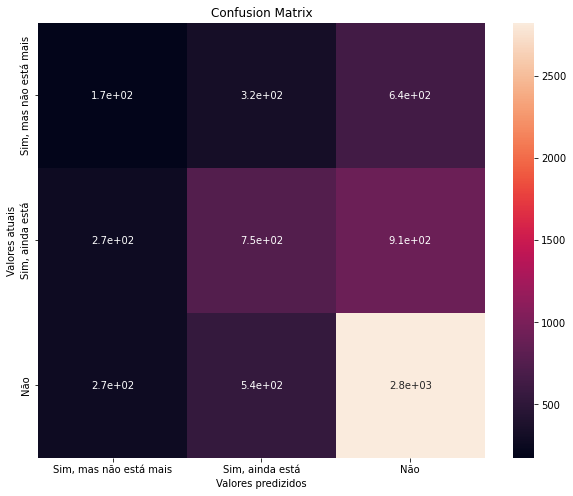

In [142]:
# Criando um dataframe pelo array formado pela matriz de confusão para facilitar o plot
cm_dt_df = pd.DataFrame(cm_dt, index=['Sim, mas não está mais', 'Sim, ainda está', 'Não'], columns=['Sim, mas não está mais', 'Sim, ainda está', 'Não'])

# Plotando a matriz de confusão para a Decision Tree
plt.figure(figsize=(10,8))
sns.heatmap(cm_dt_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Valores atuais')
plt.xlabel('Valores predizidos')
plt.show()

Para a matriz de confusão, existem os que chamamos de TP, FN, FP, TN:

- TP (Verdadeiros positivos): significa que o valor real e o previsto são os mesmos. Previu o que era positivo como positivo.
- FN (Falsos negativos): significa que o valor real é positivo, isto é, o modelo previu como negativo, mas deveria prever como positivo.
- FP (Falsos positivos): significa que o valor real é negativo, isto é, o modelo previu como positivo, mas deveria prever como negativo.
- TN (Verdadeiros negativos): significa que o valor real e previstos também são os mesmos. Preveu o que era negativo com negativo.

De forma geral, temos que para uma classificação de 3 classes, para podermos calcular esses número de instâncias que são TP ou FN ou FP ou TN, teremos:

- TP: O valor real e o valor previsto devem ser os mesmos (na matriz).
- FN: A soma dos valores da linhas correspondente, exceto para TP.
- FP: A soma dos valores da coluna correspondente, exceto para TP.
- TN: A soma dos valores de todas linhas e colunas, exceto os quais já calculamos.

Logo, para as pessoas que foram classificadas em que já possuíram nome no Serasa, embora não possuam mais, por exemplo, teremos que:

In [186]:
TPSimNaomais = list(cm_dt_df)[0][0]
FN_Sim_Naomais = list(cm_dt_df)[0][1] + list(cm_dt_df)[0][2]
FP_Sim_Naomais = list(cm_dt_df)[1][3] + list(cm_dt_df)[2][6]
TN_Sim_Naomais = list(cm_dt_df)[[1][4] + list(cm_dt_df)[1][5] + list(cm_dt_df)[2][7] + list(cm_dt_df)[2][8]

print(f"Verdadeiros positivos para pessoas que foram classificadas que já possuíram nome no Serasa, mas hoje não mais:", TPSimNaomais)
print(f"Falsos negativos para pessoas que foram classificadas que já possuíram nome no Serasa, mas hoje não mais:" , FN_Sim_Naomais)
print(f"Falsos positivos para pessoas que foram classificadas que já possuíram nome no Serasa, mas hoje não mais:", FP_Sim_Naomais)
print(f"Verdadeiros negativos para pessoas que foram classificadas que já possuíram nome no Serasa, mas hoje não mais:", TN_Sim_Naomais)

SyntaxError: invalid syntax (91600447.py, line 6)

O processo é análogo para as outras classes. Agora, apesar da matriz de confusão fornecer várias informações, podemos trabalhar com métricas mais concisas.

- `Precisão`: acurácia das predições positivas 

$$precisao = \frac{TP}{TP + FP}$$


- `Revocação`: proporção de instâncias positivas que são detectadas corretamente pelo classificador: 

$$revocacao = \frac{TP}{TP + FN}$$

rEmbora sejamos capazes de aplicar desta forma, a biblioteca Scikit-Learn já nos forneces diversas funções para calcular estas métricas, como justamente a `precision_score` e `recall_score`. No entanto, podemos obter uma métrica ainda mais interessante que é a combinação das duas já citadas por meio da média harmônica entre elas: `f1_score`. Ao passo que a média regular trata igualmente todos os valores, a média harmônica dá mais importância aos valores mais baixos. Vamos calcular para o DecisionTree.

In [144]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1_score(Y1_train, y_predset_tree, average='micro')

0.5599222952779438

Decidimos colocar `average='micro'` pois desejamos considerar todas as classes igualmente importantes.

Agora, para o `RandomForest`, teremos:

In [145]:
# Conjunto de predições para o RandomForest
y_predset_forest = cross_val_predict(forest_clf, X1_train, Y1_train, cv=6)

# Matriz de confusão
cm_rf = confusion_matrix(Y1_train, y_predset_forest)
cm_rf

array([[  61,  319,  753],
       [ 102,  763, 1062],
       [  80,  431, 3121]], dtype=int64)

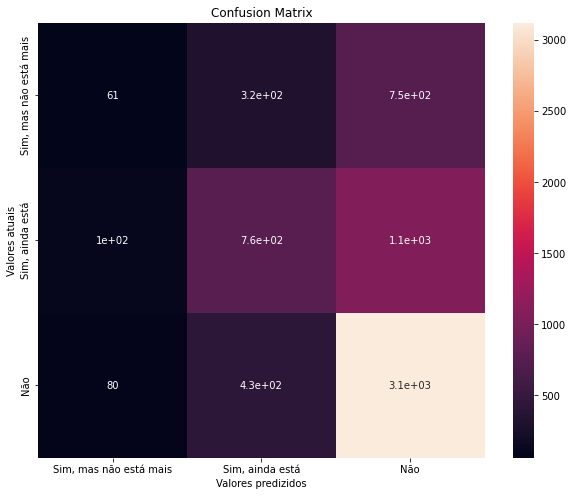

In [146]:
# Criando um dataframe pelo array formado pela matriz de confusão para facilitar o plot
cm_dt_rf = pd.DataFrame(cm_rf, index=['Sim, mas não está mais', 'Sim, ainda está', 'Não'], columns=['Sim, mas não está mais', 'Sim, ainda está', 'Não'])

# Plotando a matriz de confusão para a Random Forest
plt.figure(figsize=(10,8))
sns.heatmap(cm_dt_rf, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Valores atuais')
plt.xlabel('Valores predizidos')
plt.show()

In [147]:
f1_score(Y1_train, y_predset_forest, average='micro')

0.5895098625224148

Por fim, para o `Naive-Bayes`:

In [148]:
# Conjunto de predições para o RandomForest
y_predset_bayes = cross_val_predict(bayes_clf, X1_train, Y1_train, cv=6)

# Matriz de confusão
cm_nb = confusion_matrix(Y1_train, y_predset_bayes)
cm_nb

C:\Users\Vinicius Rodrigues\Anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
C:\Users\Vinicius Rodrigues\Anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\Vinicius Rodrigues\Anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your dat

array([[ 315,  384,  434],
       [ 569,  724,  634],
       [1137,  673, 1822]], dtype=int64)

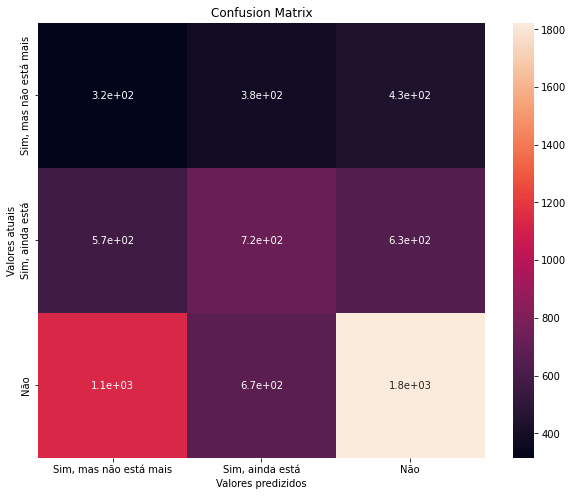

In [149]:
# Criando um dataframe pelo array formado pela matriz de confusão para facilitar o plot
cm_dt_nb = pd.DataFrame(cm_nb, index=['Sim, mas não está mais', 'Sim, ainda está', 'Não'], columns=['Sim, mas não está mais', 'Sim, ainda está', 'Não'])

# Plotando a matriz de confusão para a Naive Bayes
plt.figure(figsize=(10,8))
sns.heatmap(cm_dt_nb, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Valores atuais')
plt.xlabel('Valores predizidos')
plt.show()

In [150]:
f1_score(Y1_train, y_predset_bayes, average='micro')

0.42752540346682605

<div id="comparacao-modelos"></div>

## 5.3. Comparação dos modelos

A fim de entender um pouco melhor o desempenho dos modelos em relação uns aos outros, nós calculamos o `f1_score` de cada modelo aplicado, que não é nada mais que uma visão um pouco mais detalhada das previsões feitas em relação às classes reais dos dados. A F1_score é uma métrica importante especialmente em situações em que o balanceamento das classes é desigual, o que se aplica ao nosso caso uma vez que, como podemos ver abaixo, a primeira classe possui um percentual de 54%, a segunda com um percentual de 29% e a terceira com percentual de 17%.

In [151]:
responsaveis_df['R52'].value_counts(normalize=True).round(2)

Sim, mas não está mais    0.55
Sim, ainda está           0.28
Não                       0.17
Name: R52, dtype: float64

Logo, tendo noção do quão importante a métrica é (que nos traz um desempenho geral do modelo), se compararmos os `f1_score` dos modelos `DecisionTree`, `RandomForest` e `Naive-Bayes`, o `RandomForest` apresenta o melhor desempenho de classificação entre eles, o que se confirma com as médias de acurácias fornecidas pela validação cruzada.

$$F1(RF) > F1(DT) > F1(NB)$$

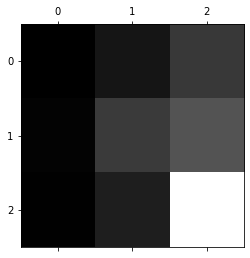

In [152]:
plt.matshow(cm_dt_rf, cmap=plt.cm.gray)
plt.show()

<div id="conclusao"></div>

# 6. Conclusão

<div id="melhorias"></div>

# 7. Possíveis melhorias

### Possíveis melhorias para o projeto

**Análise de erros**

Agora que identificamos nosso modelo mais promissor (`RandomForest`), queremos poder identificar formas de melhorá-lo e um modo de fazer isso é analisar os tipos de erro que esse modelo comete.

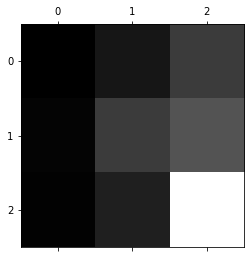

In [153]:
plt.matshow(cm_dt_rf, cmap=plt.cm.gray)
plt.show()

In [159]:
row_sums = cm_dt_rf.sum(axis=1)
norm_cm_rf = cm_dt_rf / row_sums
norm_cm_rf

,"Sim, mas não está mais","Sim, ainda está",Não
"Sim, mas não está mais",0.046778,0.165023,0.209802
"Sim, ainda está",0.090909,0.397509,0.291300
Não,0.072374,0.222107,0.859581


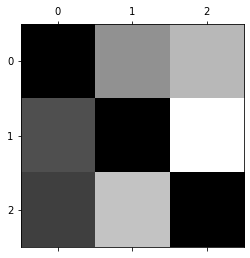

In [160]:
norm_cm_rf = norm_cm_rf.to_numpy()
np.fill_diagonal(norm_cm_rf, 0)
plt.matshow(norm_cm_rf, cmap=plt.cm.gray)
plt.show()

Dessa forma, você pode enxergar claramente os tipos de erros que o classificador comete. Aliás, vale salientar novamente que as linhas representam classes reais, ao passo que as colunas representam as classes previstas. 

Para as cores mais claras, significa dizer que houveram mais classificações errôneas, ao passo que quanto mais escuro, mais certo de que as classificações foram feitas corretamente. Logo, por exemplo, na coluna 2, em que a coluna está mais esbranquiçada, muitos foram classificados erroneamente como pessoas que nunca tiveram nome registrado no Serasa, ao invés de serem classificadas como se já tiveram e continuam com nome registrado, principalmente (classe real é esta, enquanto foi prevista como nunca teve), ou que já tiveram e continuam com nome registrado.

Portanto, uma medida que talvez seja possível de melhorar nosso modelo de classificação seria tentar reduzir esses "2" (pessoas classificadas como que nunca tiveram nome registrado) falsos.

<br>

**Ajuste dos hiperparâmetros**

Outra possível melhoria é ajustar os hiperparâmetros do classificador que foi identificado como mais promissor para o projeto (`RandomForest`) para que melhore seu desempenho. Para ajustarmos, podemos utilizar o `GridSearchCV`:

In [161]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}
grid_search = GridSearchCV(forest_clf, param_grid, cv=6, scoring='accuracy')

In [162]:
grid_search.fit(X1_train, Y1_train)
print(grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 300}


Logo, vamos aplicar novamente o `RandomForest` com esses parâmetros e avaliar:

In [163]:
forest2_clf = RandomForestClassifier(n_estimators=300, max_depth=5)

forest2_clf.fit(X1_train, Y1_train)

# Predizendo
Y1_predict2 = pd.Series(forest2_clf.predict(X1_test))

new_accuracy_topRF = accuracy_score(Y1_test, Y1_predict2)

print(f'Acurácia: {new_accuracy_topRF}')

Acurácia: 0.6248506571087217


Note que obtivemos uma melhoria de 2% em comparação com os antigos hiperparâmetros.